# Capstone: Strategies for Women in Tech to Negotiate a Salary

Author: Najiha Boosra [Github](https://git.generalassemb.ly)  

## Problem Statement
There 's plenty of talk about "women in tech" right now.

Women in Tech are a minority in the industry and don't have many tools to help them navigate the business For both new hires and seasoned industry veterans, the most challenging aspect of taking a new job is salary negotiation. 

If discussing what one have earned — and what one expect to earn — makes one uncomfortable. A survey from Glassdoor reports that 60 percent of woman and 48 percent of men believe salary history questions should not be asked. Women are also less likely to negotiate compensation, two out of three women (68 percent) do not negotiate pay compared to just about 52 percent of men.

We at NB Recruiting help place women in rewarding tech positions. Our goal is build a regression model to help predict assesses various features like education, job types, and organization, to help a woman predict her likely salary in a new job. Also for them who want to switch their job. It’s a good idea to research the job and the employer to be sure that the compensation package is negotiable.We will use root mean squared error (RMSE) as our regression metric to evaluate the success of our models.

## Executive summary 

The objective of our study is to use regression to examine the [data.world](https://data.world/finance/data-professional-salary-survey/workspace/file?filename=2019_Data_Professional_Salary_Survey_Responses.xlsx) dataset, which includes Job title, years with this type of job,  salary, and additional benefits, gathered from women all over the world. For this study, we will limit our scope to just US working women.


Our US-only dataset has 6893 observations. We cleaned the data replaced NaN values, checked for duplicates, and did extensive  exploratory data analysis, looking for individual columns of  importance to Salary, our target variable. Some variables were feature engineered to focus on the important aspects of this problem.


We checked only in the USA what type of jobs are popular in given survey years, also find out that jobs salary especially for women. women who have jobs but for some reason, they are looking for another job.  We checked how long they worked per week. How much they are getting paid with having a certificate, education level, and job status. Based on the primary database, we also look for years of working women, how about their salary, and career plan. We have a clear vision from our EDA part about Salary dependency.


Before women even think about negotiating salary, it’s important to know how much they expect to earn in their next job. If the offer isn’t close, they don’t need to take it. If they were expecting \\$60k, for example, and the offer is for \\$40k, it is probably too much of a reach. This model is designed to help women  rethink their expectations and land the right job.

## Data Dictionary 

| **Data Name**              |  **Data Type** |                          **Description**                         |
|----------------------------|:--------------:|:----------------------------------------------------------------:|
| Survey Year                |      int64     |                   years of 2017, 2018 and 2019                   |
| Timestamp                  | datetime64[ns] |                             datetime                             |
| SalaryUSD                  |     object     |                      Salary is given in USD                      |
| Country                    |     Object     |                      Countries of the survey                     |
| PrimaryDatabase            |     Object     |                     Tech related Job database                    |
| YearsWithThisDatabase      |      int64     |        How many year people are working in these databases       |
| EmploymentStatus           |     Object     |   Type of employee statuses like full time/per time and others   |
| JobTitle                   |     Object     |         Title of the Job related to the primary database         |
| ManageStaff                |     Object     | Title of the Job related to the Managing staff as a boolean form |
| YearsWithThisTypeOfJob     |      int64     |         How many years people are working with these jobs        |
| CompanyEmployeesOverall    |     Object     |               Range of total employees in companies              |
| Education                  |     Object     |                        Level of education                        |
| EducationIsComputerRelated |     Object     |           Education is related to computer based or not          |
| Certifications             |     Object     |              Their certificates are valid or expired             |
| HoursWorkedPerWeek         |      int64     |             How many hours per week they are working             |
| LookingForAnotherJob       |     Object     |           Who are looking for new job passively or not           |
| CareerPlansThisYear        |     Object     |              about career plan they are asked or not             |
| Gender                     |     Object     |               Male, Female and Other gender people               |

## Contents 
 - [Loading Libraries](#Loading-Libraries). 
     - [Reading Data](#Reading-Data). 
 - [Data Cleaning](#Data-Cleaning). 
 - [Exploratory data analysis](#Exploratory-data-analysis)  
      - [Feature Engineering for column Country](#Feature-Engineering-for-column-Country)  
      - [Feature Engineering for column Gender](#Feature-Engineering-for-column-Gender)  
      - [Conversion Dictionary for 'Education' Column](#Conversion-Dictionary-for-Education-Column)  
      - [Feature Engineering for column ManageStaff](#Feature-Engineering-for-column-ManageStaff)
      - [Dummy categorical features](#Dummy-categorical-features)  

- [Model Preparation](#Model-Preparation)  
     - [Train and Test Splits](#Train-and-Test-Splits)  
     - [Data Scaling](#Data-Scaling)  

- [Modeling](#Modeling)  
     - [Baseline Model](#Baseline-Model)  
     - [Linear Regression](#Linear-Regression)  
     - [Lasso Regression](#Lasso-Regression)  
     - [Ridge Regression](#Ridge-Regression)  
     - [Decision Tree Regression](#Decision-Tree-Regression)  
     - [Bagging Regressor](#Bagging-Regressor)
     - [Random Forest Regression](#Random-Forest-Regression)  
     - [AdaBoost Regressor Model](#AdaBoost-Regressor-Model)
     - [Support Vector Regression](#Support-Vector-Regression). 
     - [Gradient Boosting Regressor Model](#Gradient-Boosting-Regressor-Model)

- [Model Selection](#Model-Selection)  
     - [Compare all Models](#Compare-all-Models)  

- [Model Evaluation](#Model-Evaluation)  
     - [Feature Importance](#Feature-Importance)  
     - [Ploting Important features](#Ploting-Important-features). 
     
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)  

- [Reference](#Reference) 
 

### Loading Libraries 

In [16]:
import warnings
warnings.filterwarnings("ignore")



import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes = True, font_scale=3)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

RANDOM_STATE = 2341

#### Reading Data

In [17]:
keep_cols = ['Survey Year', 'Timestamp', 'Country', 'PrimaryDatabase', 'YearsWithThisDatabase',
             'EmploymentStatus', 'JobTitle','CompanyEmployeesOverall','ManageStaff', 'Education', 
             'EducationIsComputerRelated', 'Certifications', 'HoursWorkedPerWeek','SalaryUSD',
             'LookingForAnotherJob', 'CareerPlansThisYear', 'YearsWithThisTypeOfJob', 'Gender']

df = pd.read_excel("../datasets/2019_Data_Professional_Salary_Survey_Responses.xlsx",
                      skiprows= 3,usecols= keep_cols)

sorting index

In [18]:
df.sort_index(inplace = True, ascending = True)

Display the first 5 rows to see observations.

In [7]:
df.head()

,Survey Year,Timestamp,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,CompanyEmployeesOverall,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,LookingForAnotherJob,CareerPlansThisYear,Gender
0,2017,2017-01-05 05:10:20.451,200000,United States,Microsoft SQL Server,10,Full time employee,DBA,No,5,Not Asked,Masters,No,"Yes, and they're currently valid",45,"Yes, but only passively (just curious)",Not Asked,Not Asked
1,2017,2017-01-05 05:26:23.388,61515,United Kingdom,Microsoft SQL Server,15,Full time employee,DBA,No,3,Not Asked,None (no degree completed),NaN,"No, I never have",35,No,Not Asked,Not Asked
2,2017,2017-01-05 05:32:57.367,95000,Germany,Microsoft SQL Server,5,Full time employee,Other,Yes,25,Not Asked,Masters,Yes,"Yes, but they expired",45,"Yes, but only passively (just curious)",Not Asked,Not Asked
3,2017,2017-01-05 05:33:03.316,56000,United Kingdom,Microsoft SQL Server,6,Full time employee,DBA,No,2,Not Asked,Associates (2 years),No,"No, I never have",40,"Yes, but only passively (just curious)",Not Asked,Not Asked
4,2017,2017-01-05 05:34:33.866,35000,France,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,DBA,No,10,Not Asked,Bachelors (4 years),Yes,"Yes, but they expired",40,"Yes, but only passively (just curious)",Not Asked,Not Asked


Display the dimensions of the dataset

In [8]:
df.shape

(6893, 18)

### Data Cleaning

Checking Data types

In [9]:
df.dtypes

Survey Year                            int64
Timestamp                     datetime64[ns]
SalaryUSD                             object
Country                               object
PrimaryDatabase                       object
YearsWithThisDatabase                  int64
EmploymentStatus                      object
JobTitle                              object
ManageStaff                           object
YearsWithThisTypeOfJob                 int64
CompanyEmployeesOverall               object
Education                             object
EducationIsComputerRelated            object
Certifications                        object
HoursWorkedPerWeek                     int64
LookingForAnotherJob                  object
CareerPlansThisYear                   object
Gender                                object
dtype: object

Some feaures are numeric and some are categorical
Filtering the categorical features:

In [10]:
df["SalaryUSD"].unique()

array([200000, 61515, 95000, ..., 60650, 96700, 81200], dtype=object)

Converting our target column SalaryUSD object to an integer

In [19]:
df["SalaryUSD"]=df["SalaryUSD"].replace({'\$': '', ',': '', ' ':''}, regex=True).astype(int)

Checking data types for confirmation

In [12]:
df.dtypes

Survey Year                            int64
Timestamp                     datetime64[ns]
SalaryUSD                              int64
Country                               object
PrimaryDatabase                       object
YearsWithThisDatabase                  int64
EmploymentStatus                      object
JobTitle                              object
ManageStaff                           object
YearsWithThisTypeOfJob                 int64
CompanyEmployeesOverall               object
Education                             object
EducationIsComputerRelated            object
Certifications                        object
HoursWorkedPerWeek                     int64
LookingForAnotherJob                  object
CareerPlansThisYear                   object
Gender                                object
dtype: object

We cannot simply ignore missing values in our dataset. We must handle them in some way for the very practical reason that Scikit-Learn algorithms do not accept missing values.

In [13]:
df.isnull().sum()

Survey Year                      0
Timestamp                        0
SalaryUSD                        0
Country                          0
PrimaryDatabase                  0
YearsWithThisDatabase            0
EmploymentStatus                 0
JobTitle                         0
ManageStaff                      0
YearsWithThisTypeOfJob           0
CompanyEmployeesOverall          0
Education                        0
EducationIsComputerRelated    1216
Certifications                   0
HoursWorkedPerWeek               0
LookingForAnotherJob             0
CareerPlansThisYear              0
Gender                           0
dtype: int64

In the entire data set, there are 1216 NaN values.The best way to handle missing data for categorical features is to simply label them as 'Missing'.

In [20]:
df.fillna('Missing', inplace=True)

Checking the change

In [15]:
df.head()

,Survey Year,Timestamp,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,CompanyEmployeesOverall,Education,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,LookingForAnotherJob,CareerPlansThisYear,Gender
0,2017,2017-01-05 05:10:20.451,200000,United States,Microsoft SQL Server,10,Full time employee,DBA,No,5,Not Asked,Masters,No,"Yes, and they're currently valid",45,"Yes, but only passively (just curious)",Not Asked,Not Asked
1,2017,2017-01-05 05:26:23.388,61515,United Kingdom,Microsoft SQL Server,15,Full time employee,DBA,No,3,Not Asked,None (no degree completed),Missing,"No, I never have",35,No,Not Asked,Not Asked
2,2017,2017-01-05 05:32:57.367,95000,Germany,Microsoft SQL Server,5,Full time employee,Other,Yes,25,Not Asked,Masters,Yes,"Yes, but they expired",45,"Yes, but only passively (just curious)",Not Asked,Not Asked
3,2017,2017-01-05 05:33:03.316,56000,United Kingdom,Microsoft SQL Server,6,Full time employee,DBA,No,2,Not Asked,Associates (2 years),No,"No, I never have",40,"Yes, but only passively (just curious)",Not Asked,Not Asked
4,2017,2017-01-05 05:34:33.866,35000,France,Microsoft SQL Server,10,Full time employee of a consulting/contracting...,DBA,No,10,Not Asked,Bachelors (4 years),Yes,"Yes, but they expired",40,"Yes, but only passively (just curious)",Not Asked,Not Asked


Display info for the features

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Survey Year                 6893 non-null   int64         
 1   Timestamp                   6893 non-null   datetime64[ns]
 2   SalaryUSD                   6893 non-null   int64         
 3   Country                     6893 non-null   object        
 4   PrimaryDatabase             6893 non-null   object        
 5   YearsWithThisDatabase       6893 non-null   int64         
 6   EmploymentStatus            6893 non-null   object        
 7   JobTitle                    6893 non-null   object        
 8   ManageStaff                 6893 non-null   object        
 9   YearsWithThisTypeOfJob      6893 non-null   int64         
 10  CompanyEmployeesOverall     6893 non-null   object        
 11  Education                   6893 non-null   object      

Final Checking for null values

In [17]:
df.isnull().sum().sum()

0

Filter out duplicates

In [21]:
df = df[~df.duplicated()]

In [19]:
df.shape

(6893, 18)

It looks like we didn't have any duplicates in our original dataset.

### Exploratory data analysis

In [20]:
df['Country'].value_counts()

United States         4509
United Kingdom         667
Canada                 244
Australia              185
India                  112
                      ... 
Kenya                    1
Vietnam                  1
Nepal                    1
Indonesia                1
Dominican Republic       1
Name: Country, Length: 85, dtype: int64

#### Feature Engineering for column Country

In [22]:
def country_map(x):
    if x == "United States":
        return 1
    else:
        return 0

We are going focus only in United State.  

In [23]:
df['Country'] = df['Country'].map(country_map)

In [23]:
df['PrimaryDatabase'].value_counts()

Microsoft SQL Server       6461
Oracle                      215
PostgreSQL                   46
Other                        38
MySQL/MariaDB                29
Azure SQL DB                 24
DB2                          16
Microsoft Access             15
Amazon RDS (any flavor)      13
SAP                          11
Teradata                     11
MongoDB                       6
SQLite                        4
Elasticsearch                 2
Cassandra                     2
Name: PrimaryDatabase, dtype: int64

These are the Jobs our dataset has provided pieces of information. Almost are Tech related jobs.most of the survey is based on Microsoft SQL Server. There are less information about Cassandra and Elasticsearch.

#### Feature Engineering for column Gender

In [24]:
def gender_map(x):
    if x == "Female":
        return "Female"
    else:
        return "Non-Female"

We are going to focus only on 'female' for that it will be a good idea to do feature engineering here.

In [25]:
df['Gender'] = df['Gender'].map(gender_map)

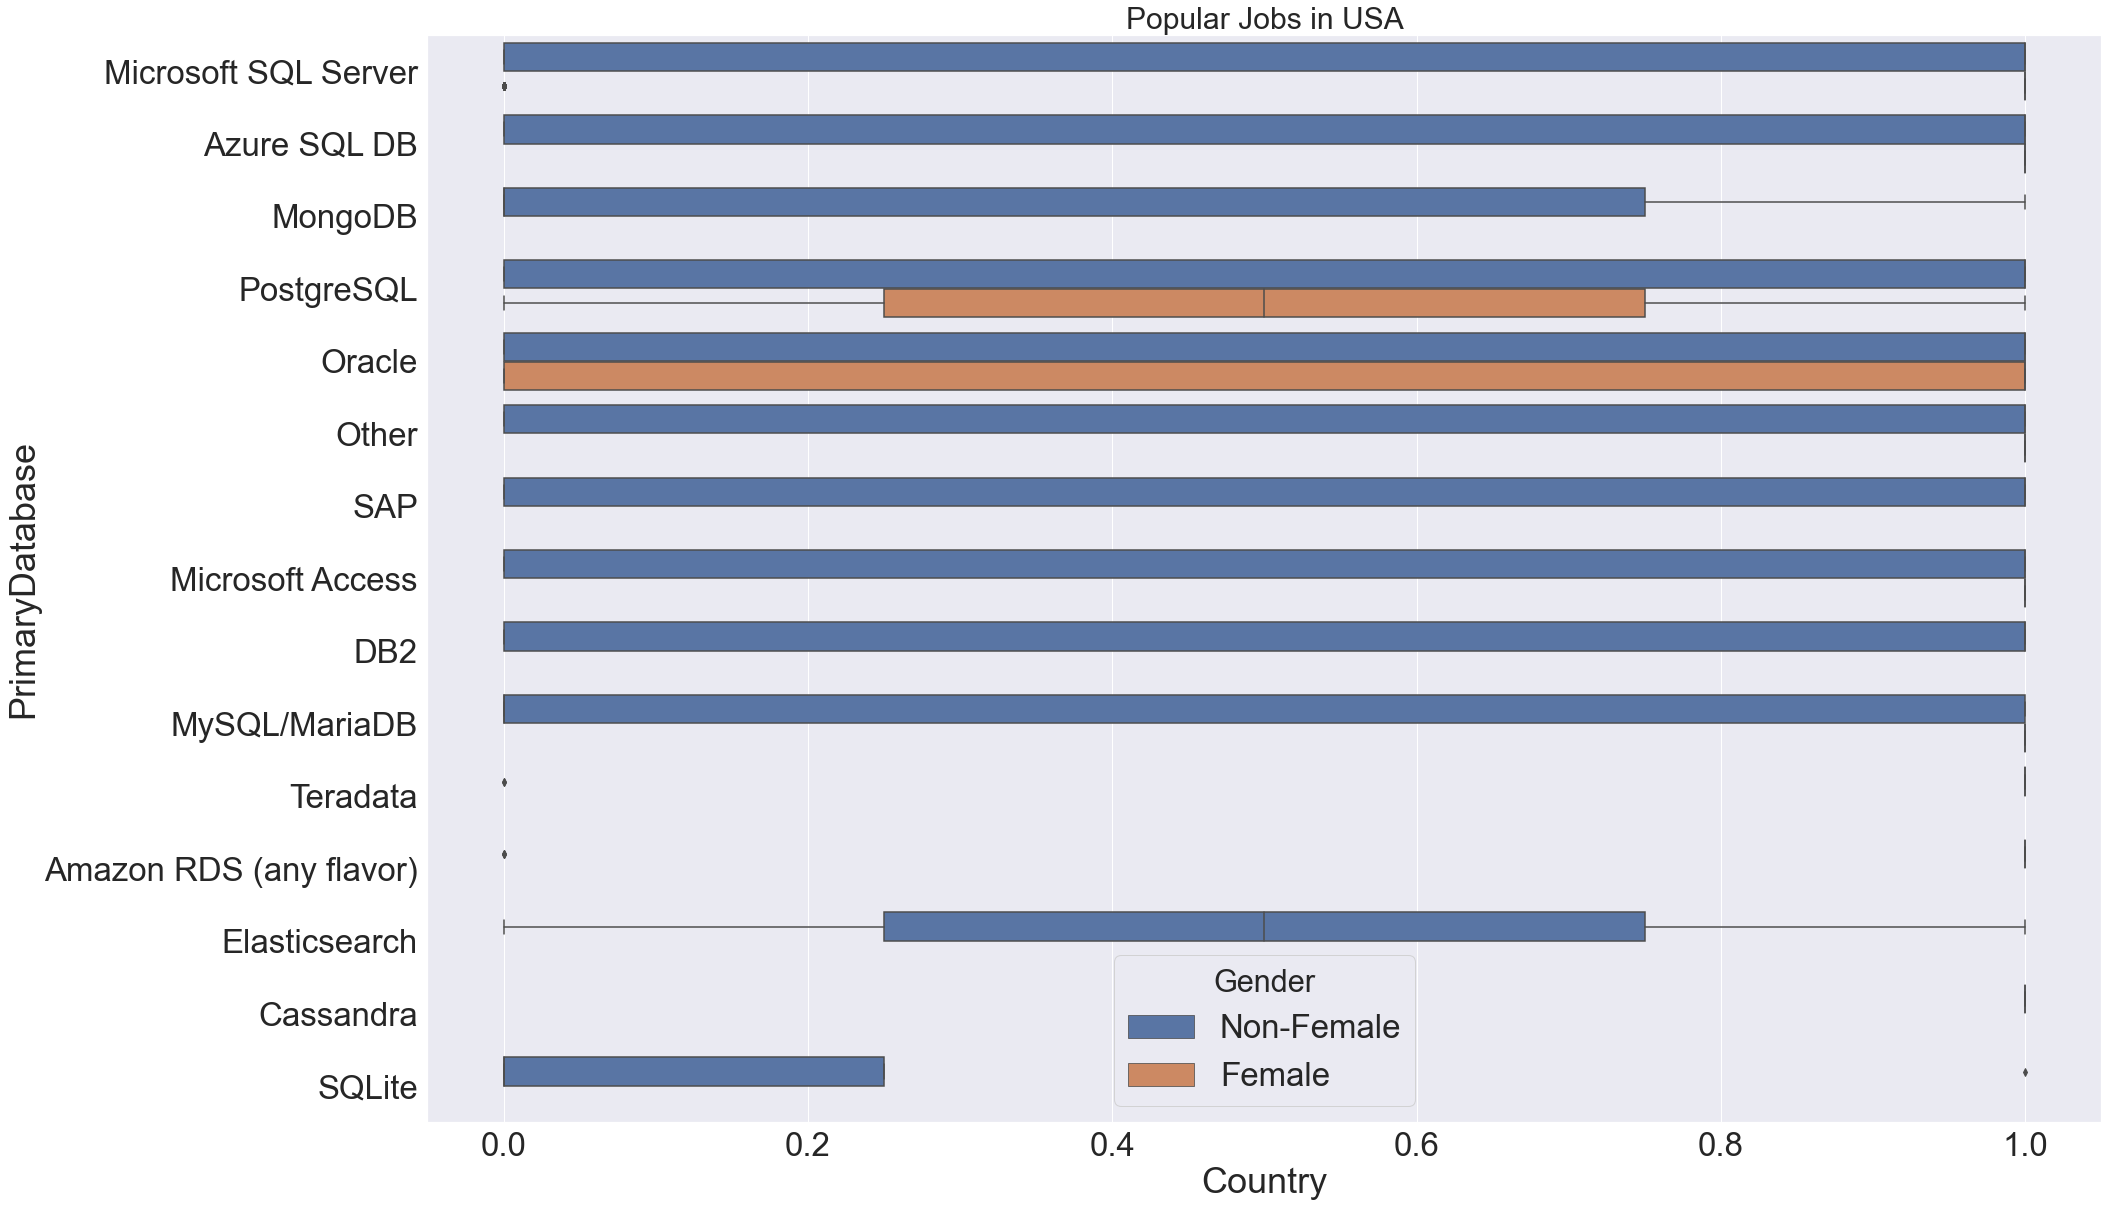

In [43]:
plt.figure(figsize = (30,20))
sns.boxplot(data = df,x = 'Country',  y = 'PrimaryDatabase', hue = 'Gender')
plt.title("Popular Jobs in USA", fontsize=30);

In USA PostgreSQL and Oracle are most popular job for women besides other jobs. But almost tech jobs are popular in the USA. Teradata, Amazon RDS, Cassandra has less popularity.

In [28]:
df['JobTitle'].value_counts()

DBA                                                                                                           1514
DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)    1068
DBA (Production Focus - build & troubleshoot servers, HA/DR)                                                   688
Developer: T-SQL                                                                                               666
Architect                                                                                                      533
Developer: Business Intelligence (SSRS, PowerBI, etc)                                                          488
Developer: App code (C#, JS, etc)                                                                              486
Manager                                                                                                        394
Analyst                                                                         

Let us find out how salary related to these Job titles above by plotting barplot and also find out how much women are getting within these titles.

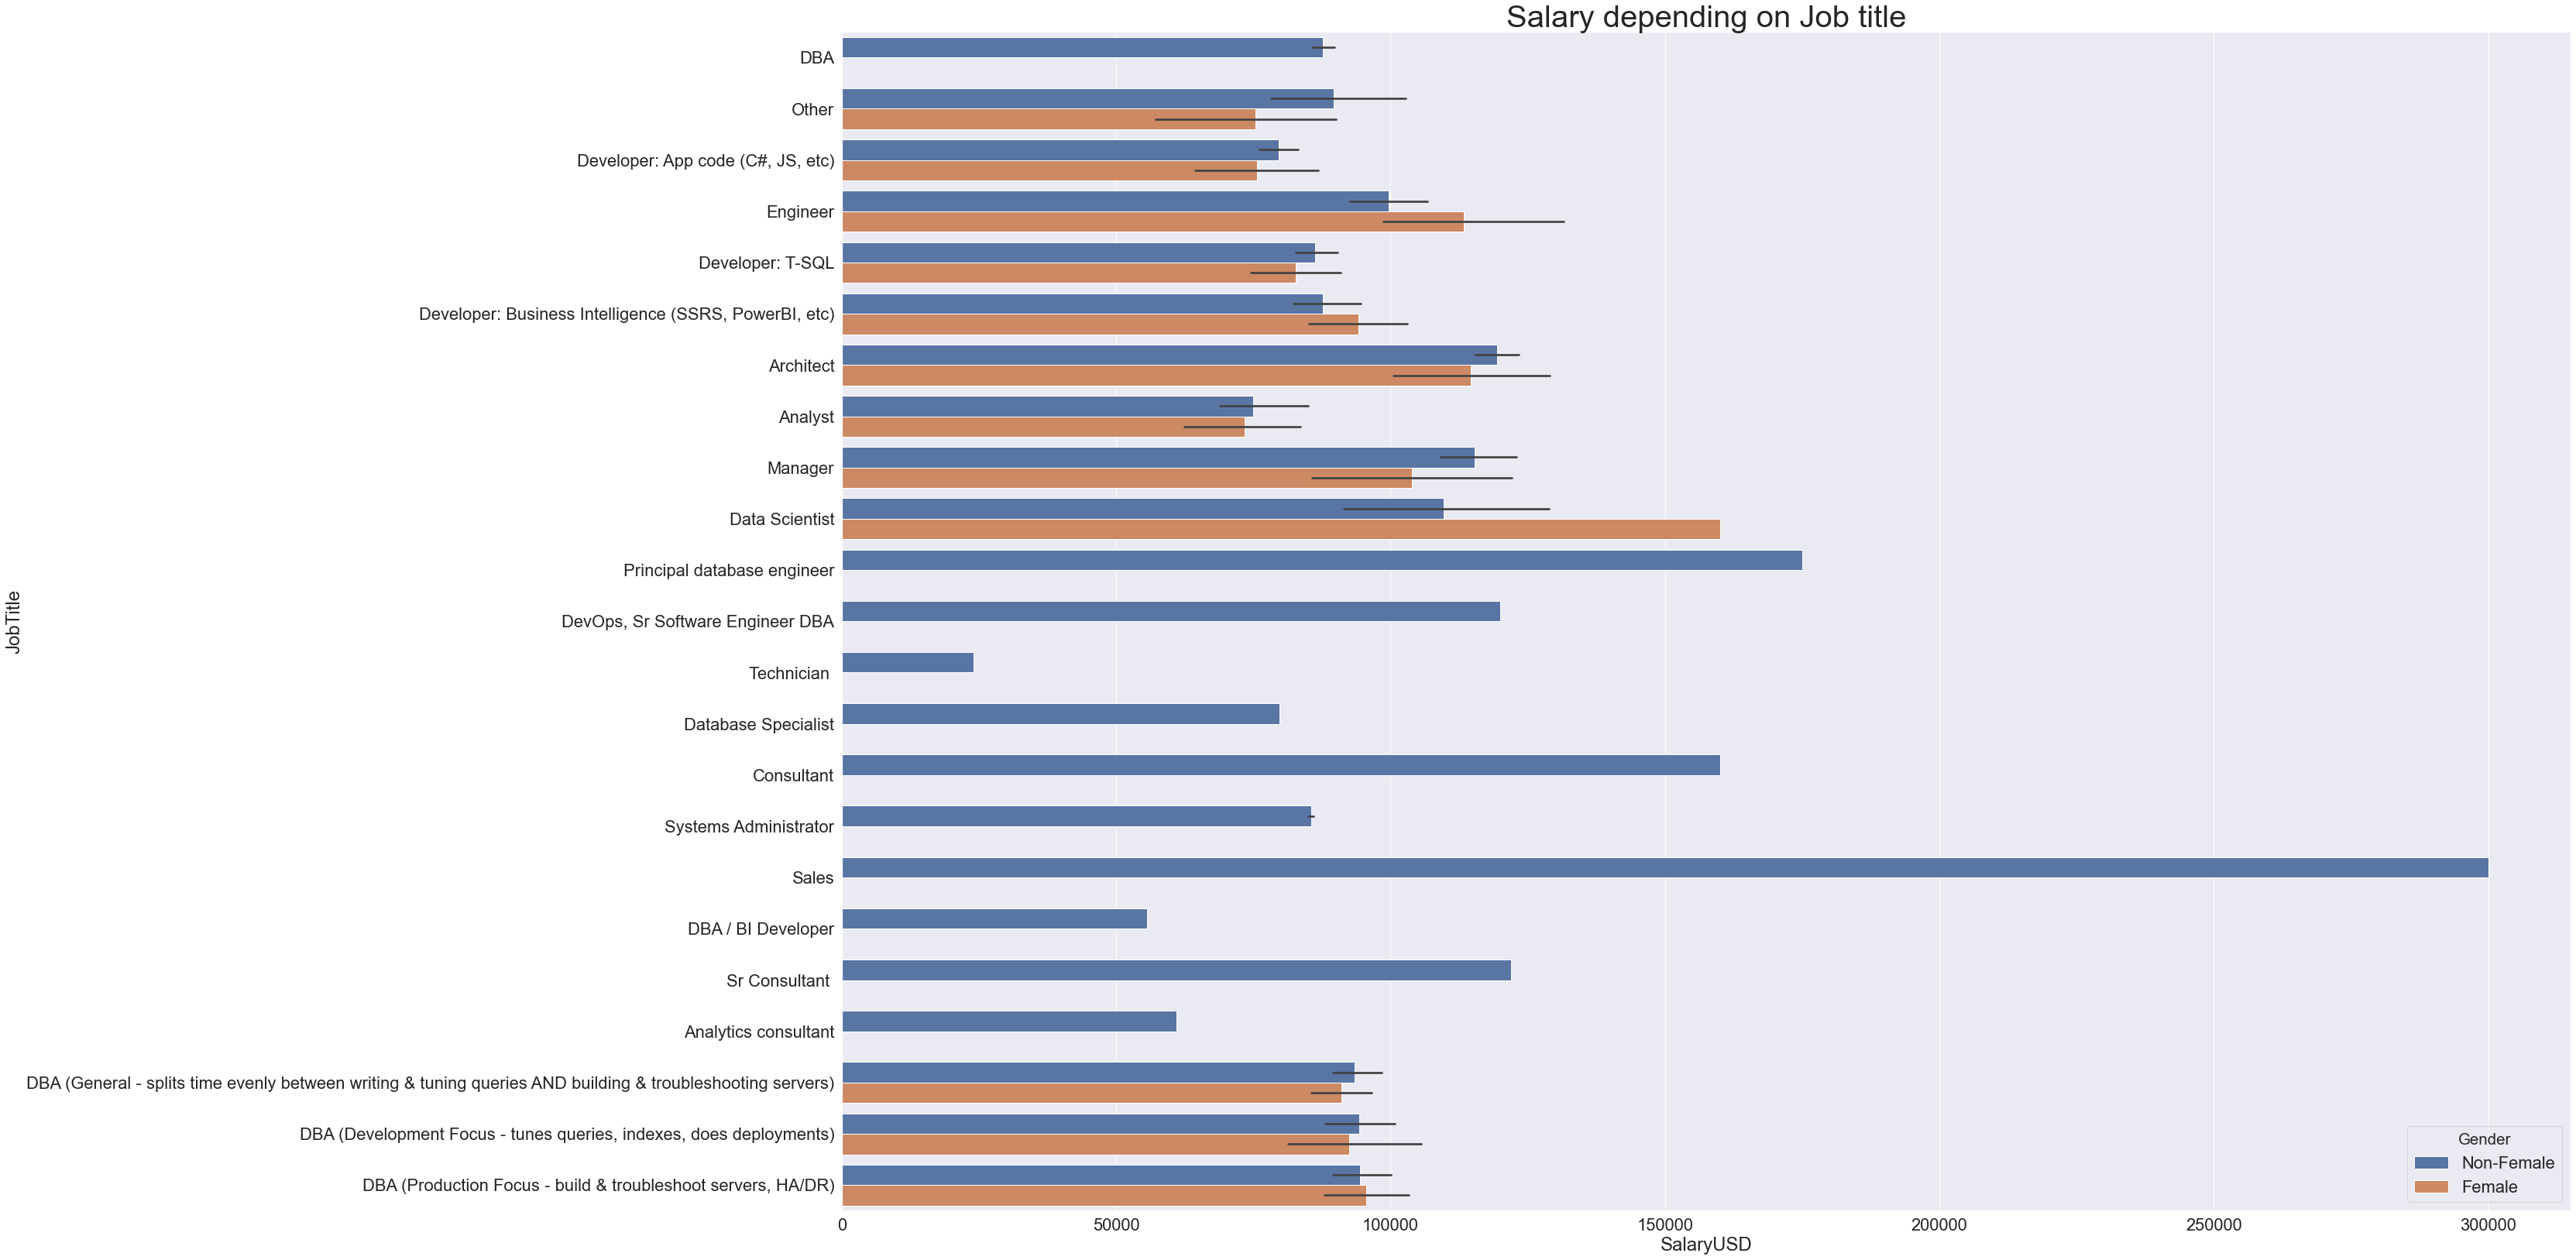

In [49]:
plt.figure(figsize = (40,28))
sns.barplot(data = df,x = 'SalaryUSD',  y = 'JobTitle', hue = 'Gender')
plt.title("Salary depending on Job title", fontsize = 40);

From 2017 to 2019 still in many sectors women are less paid than men. But we can see a tremendous salary increase for women as a "Data Scientist" which is almost near to \\$150k. As an 'Engineer' they are getting near to \\$100k salary nowadays.

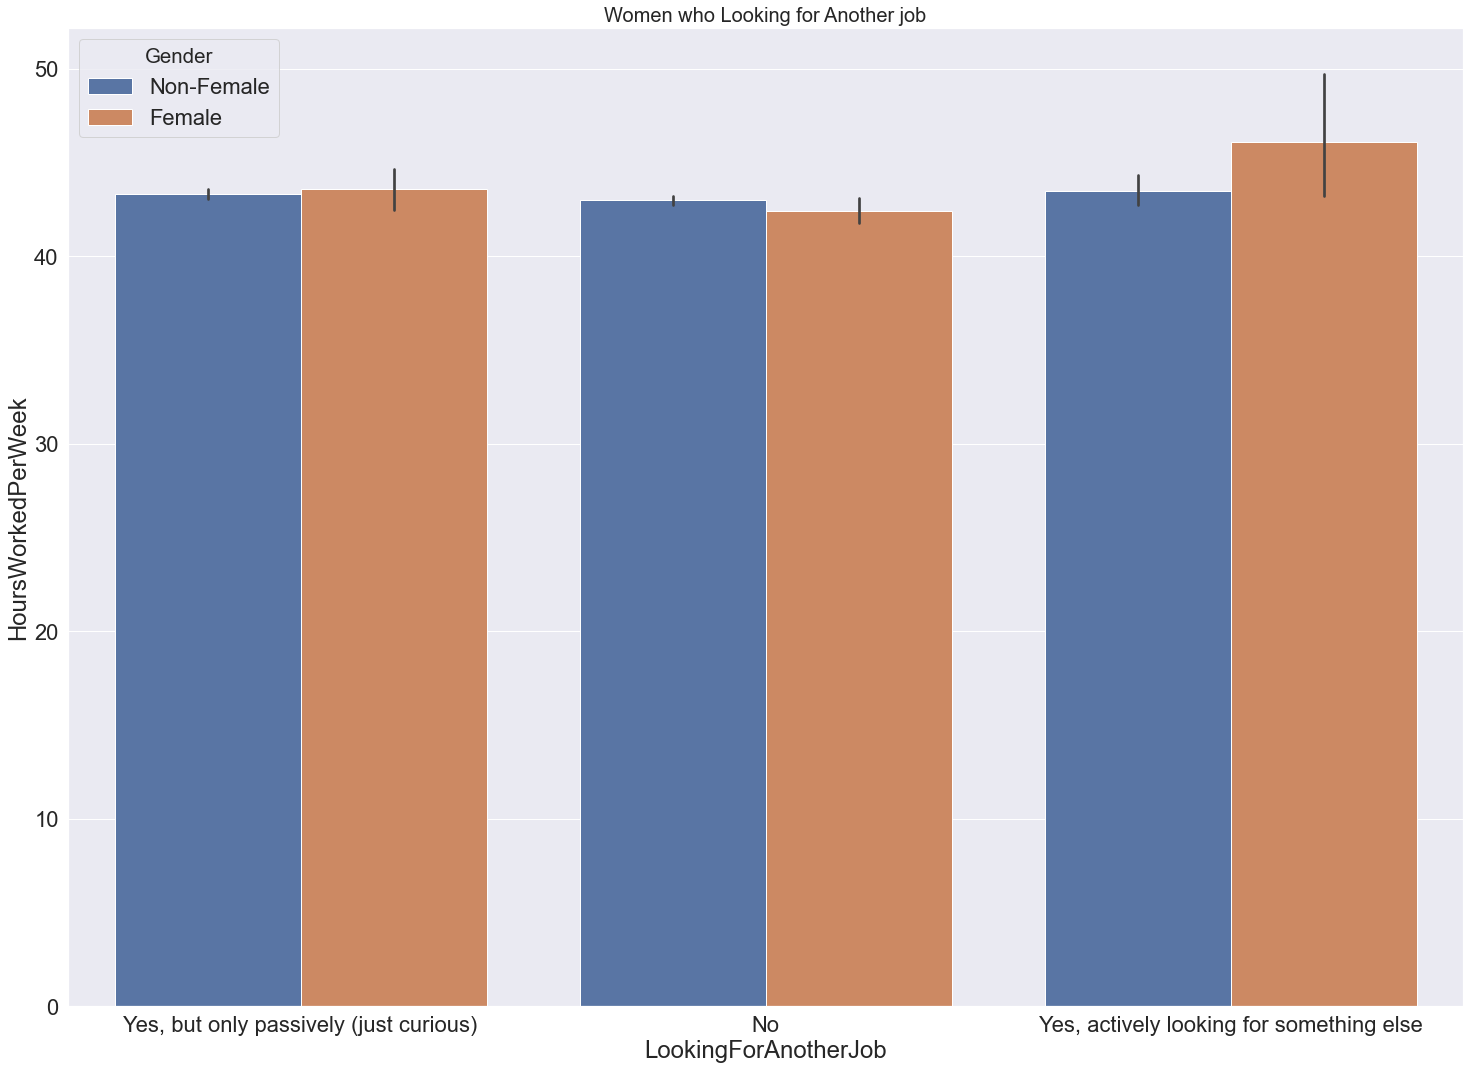

In [50]:
plt.figure(figsize = (25,18))
sns.barplot(data = df,y = 'HoursWorkedPerWeek',  x = 'LookingForAnotherJob', hue = 'Gender')

plt.title("Women who Looking for Another job", fontsize = 20);

Here we can clearly see that, after 2017  women are getting interested to look for better job. May be Some of them are not satisfied with current job or current salary or hour. Who are actively looking for job they are working almost 45hrs/week. Curious women and also not interested to switch job also has 40hr/week working hours most

In [31]:
df['Certifications'].value_counts()

No, I never have                    3357
Yes, and they're currently valid    1813
Yes, but they expired               1723
Name: Certifications, dtype: int64

In this column there are three types of people, let see by plotting a barplot that how much it depends on the salary.

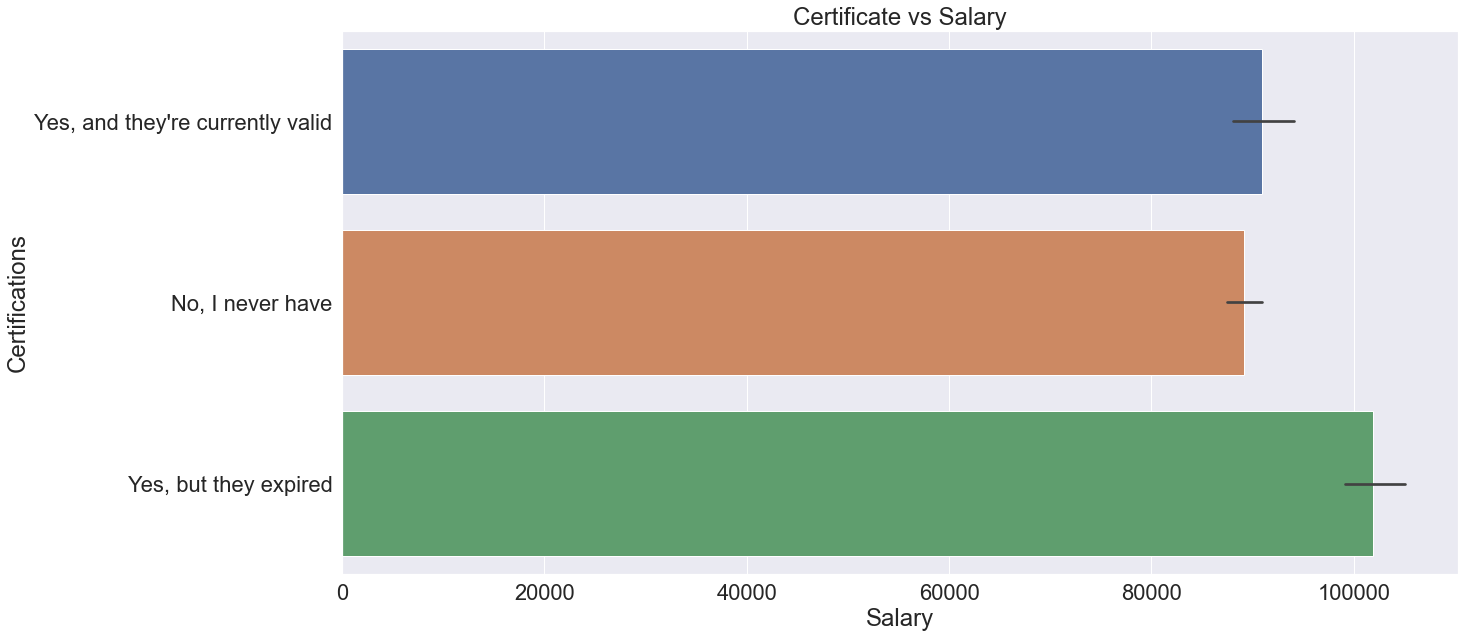

In [51]:
plt.figure(figsize=(20,10))
    
plt.title('Certificate vs Salary')

sns.barplot(y = df['Certifications'], x = df["SalaryUSD"])


plt.xlabel('Salary')
plt.ylabel('Certifications');

For everyone who can see if they Didn't have or have a valid certificate they can earn more than \\$80000, But who had expired certificate(people who are working for long or experienced) they are earning more than \\$100k.

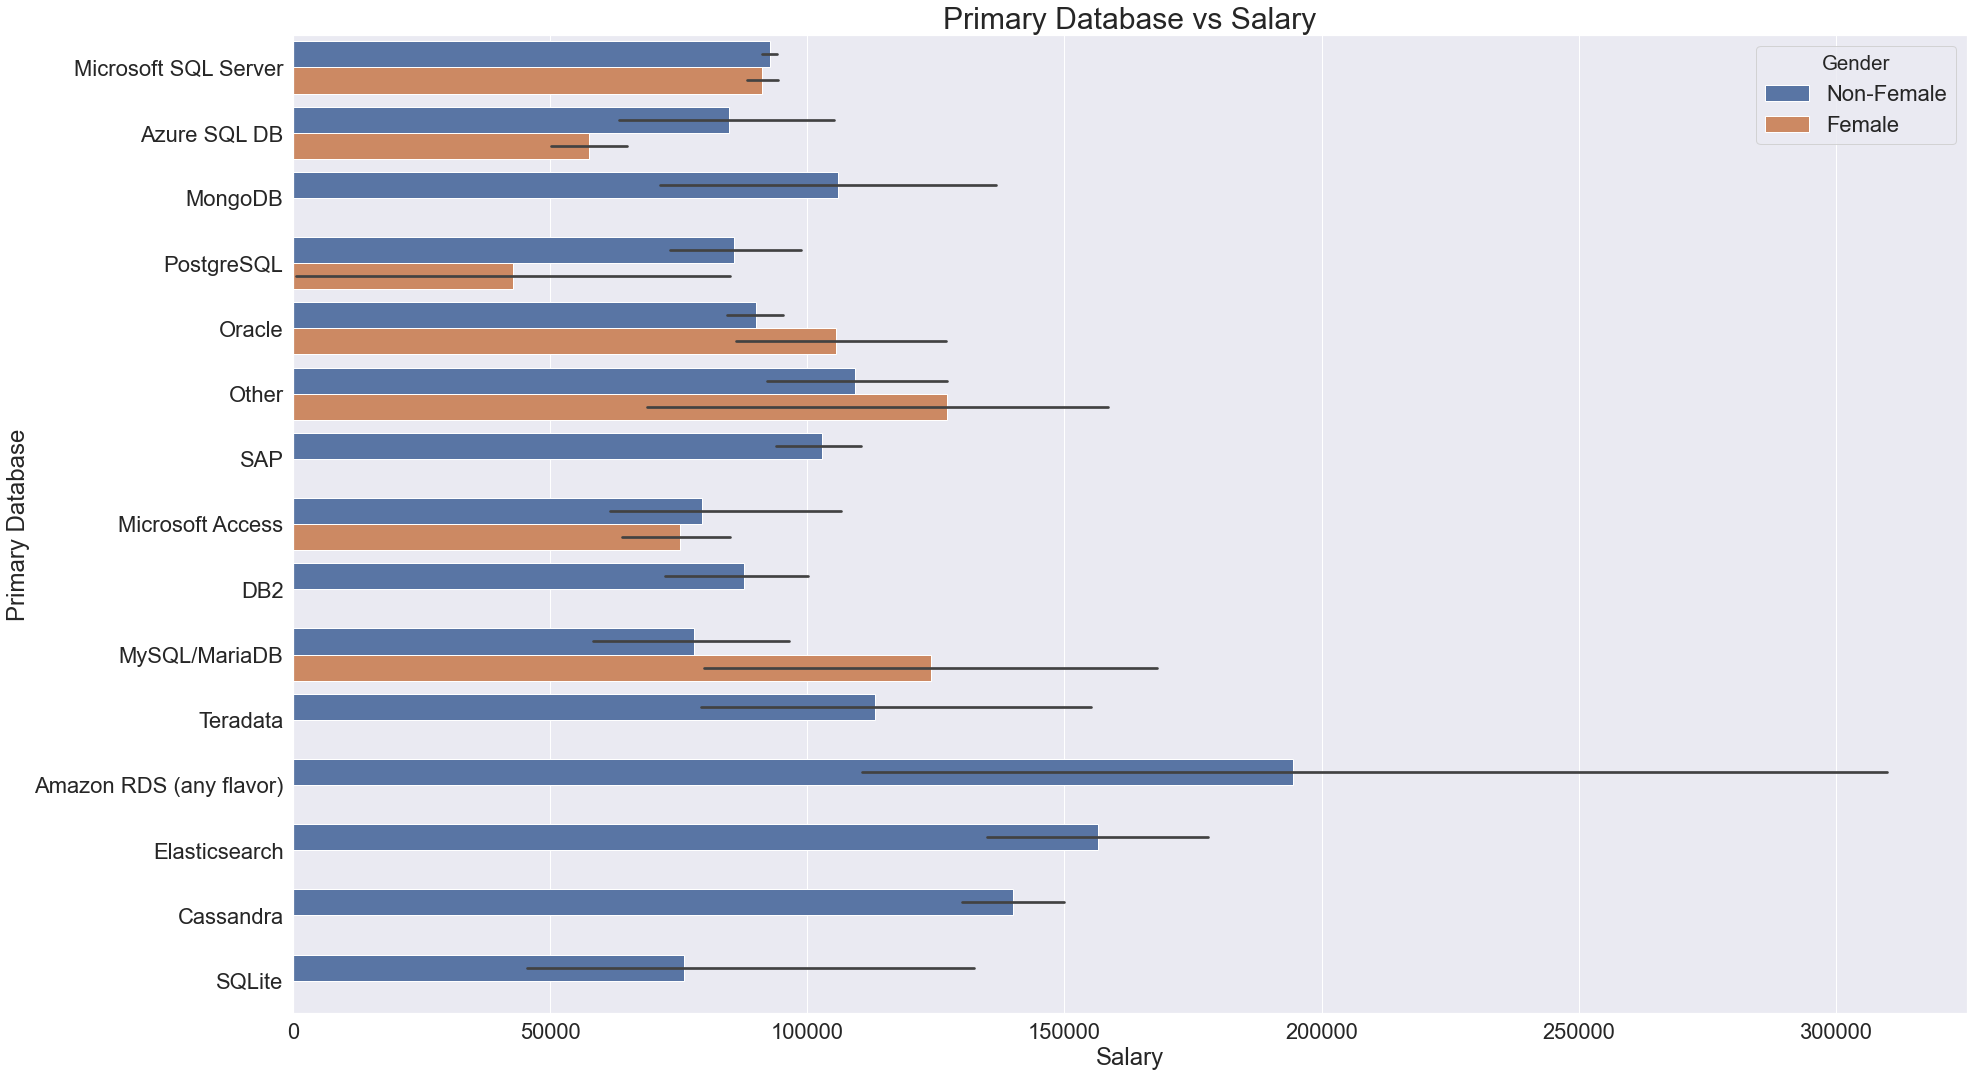

In [53]:
plt.figure(figsize=(30,18))
    
plt.title('Primary Database vs Salary', fontsize = 30)

sns.barplot(y = df['PrimaryDatabase'], x = df["SalaryUSD"],
           hue= df['Gender'])


plt.xlabel('Salary')
plt.ylabel('Primary Database');

Here we can see that women are getting more than \\$100k in MySQL/MariaDB and 'other' sector of job. Also getting less paid in,  PostgreSQL which is less than \\$50k. But for all gender most paid amount is almost \\$200k in Amazon RDS(any flavor).

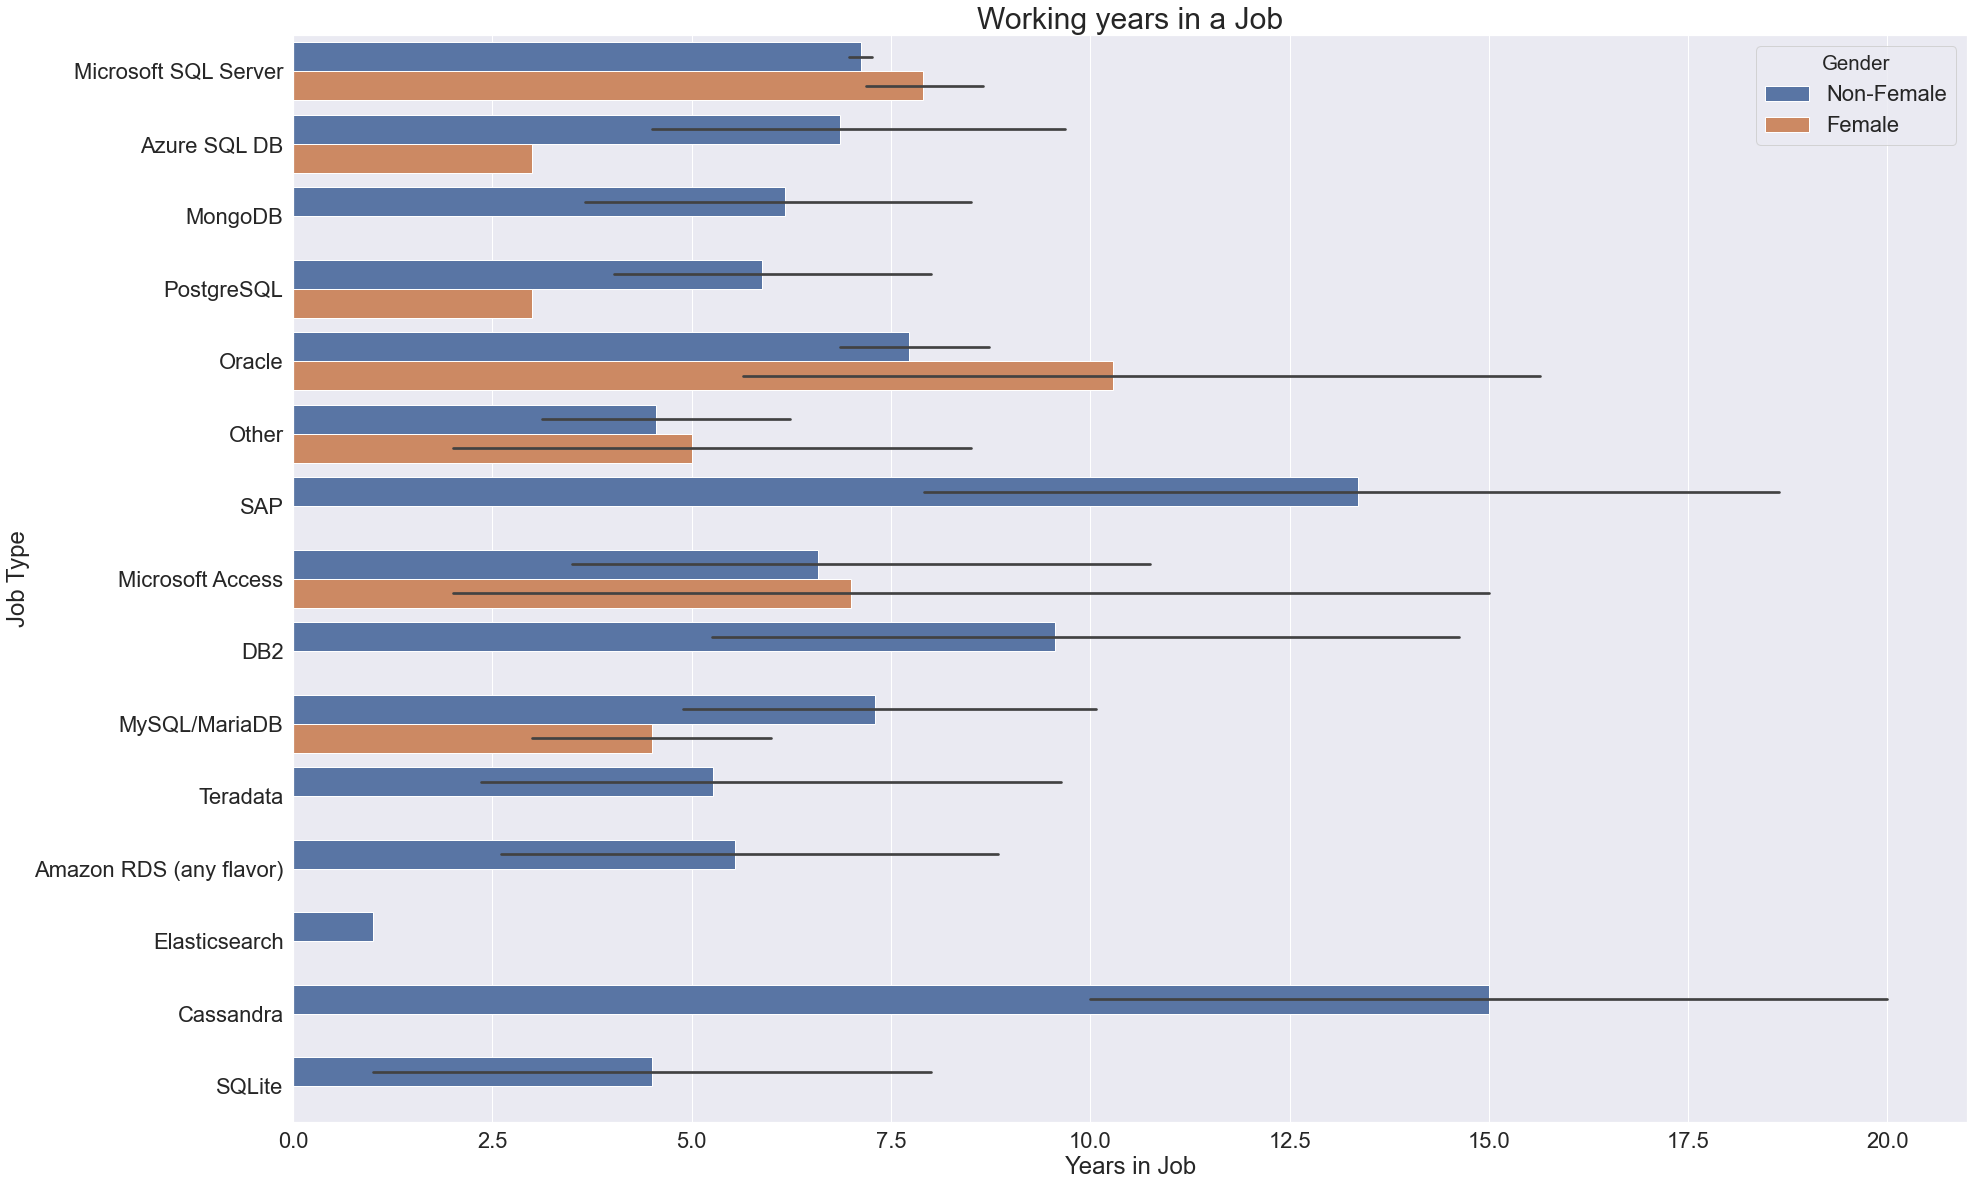

In [54]:
plt.figure(figsize=(30, 20))
plt.title("Working years in a Job", fontsize = 30)

sns.barplot( df['YearsWithThisTypeOfJob'], df['PrimaryDatabase'], hue = df['Gender'])

plt.xlabel("Years in Job")
plt.ylabel("Job Type");

Jobs like 'Microsoft SQL Server' and 'Oracle' women are working almost like 8 to 10 years! It's a good sign! Otherwise, it seems hard 5 years in the Tech field for women.thus women are working in tech feild for long way. More experience means they are working for long years in this field.

In [55]:
df['EmploymentStatus'].value_counts()

Full time employee                                                   6101
Full time employee of a consulting/contracting company                495
Independent consultant, contractor, freelancer,  or company owner     171
Independent or freelancer or company owner                            104
Part time                                                              22
Name: EmploymentStatus, dtype: int64

According to our dataset, there are 5 types of employment status. The salary differs in every step. Let us plot a barplot to see visually.

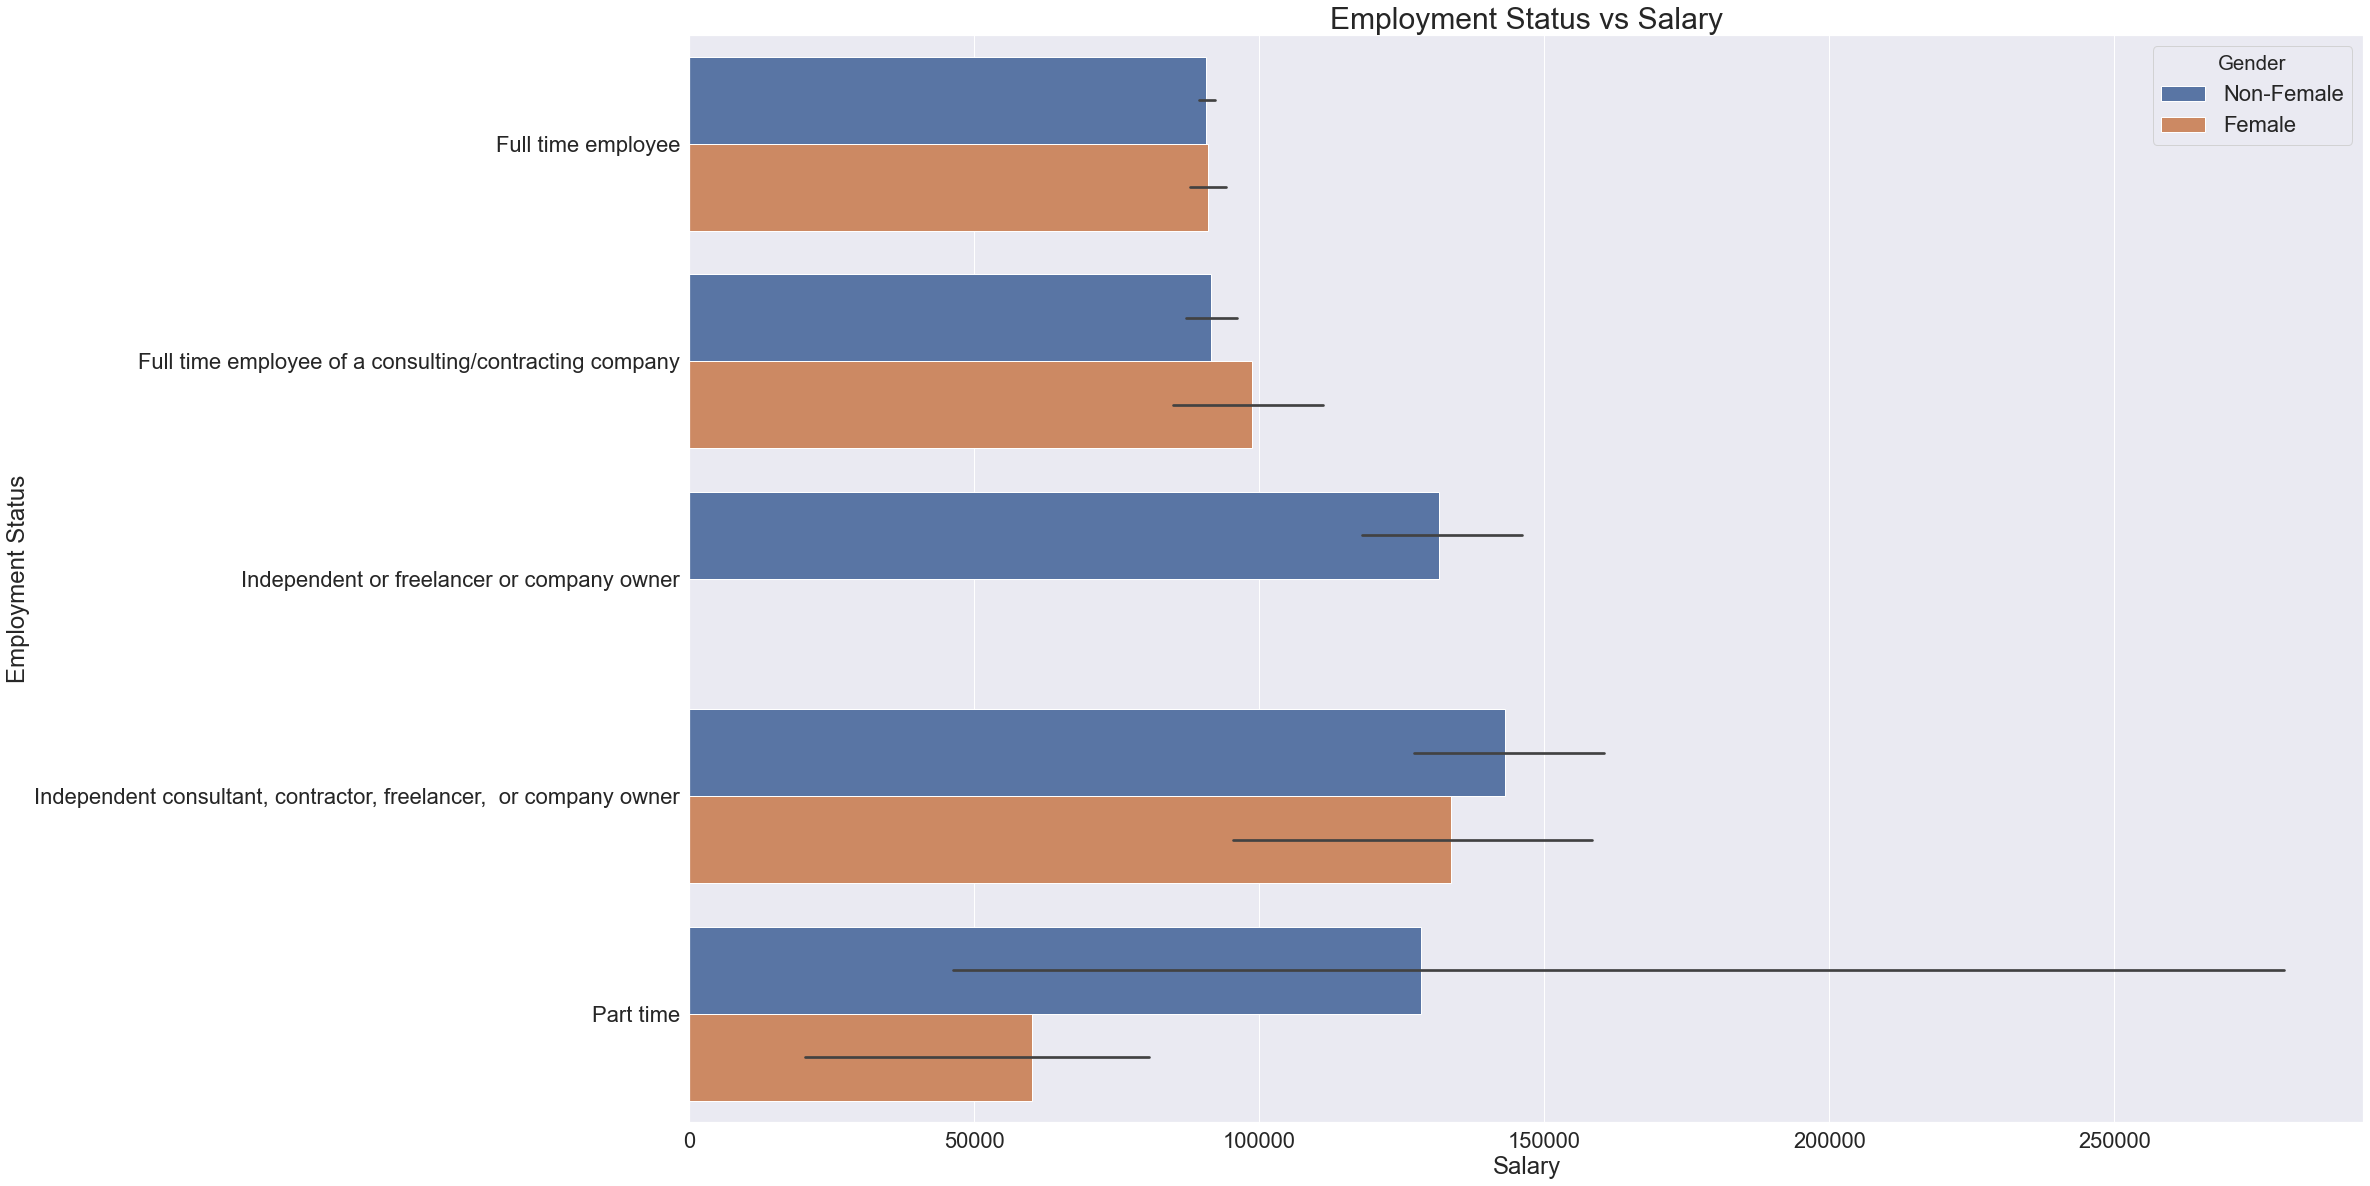

In [56]:
plt.figure(figsize=(30,20))
    
plt.title('Employment Status vs Salary', fontsize = 30)

sns.barplot(y = df['EmploymentStatus'], x = df["SalaryUSD"], hue = df['Gender'])


plt.xlabel('Salary')
plt.ylabel('Employment Status');

We notice for women who are 'Independent consultants, Contractors, freelancers or company owners' having a salary less than \\$130k which seems to be the highest salary. Otherwise in almost every status of employment women are getting less paid than another gender. Only as a 'Full-time employee' all gender getting almost \\$90k Accordingly 2017 to 2019 years.

In [ ]:
df['CareerPlansThisYear'].value_counts()

There are lots of cause that people want to change their role. Sometimes thay say it, sometimes they are not being asked about it.

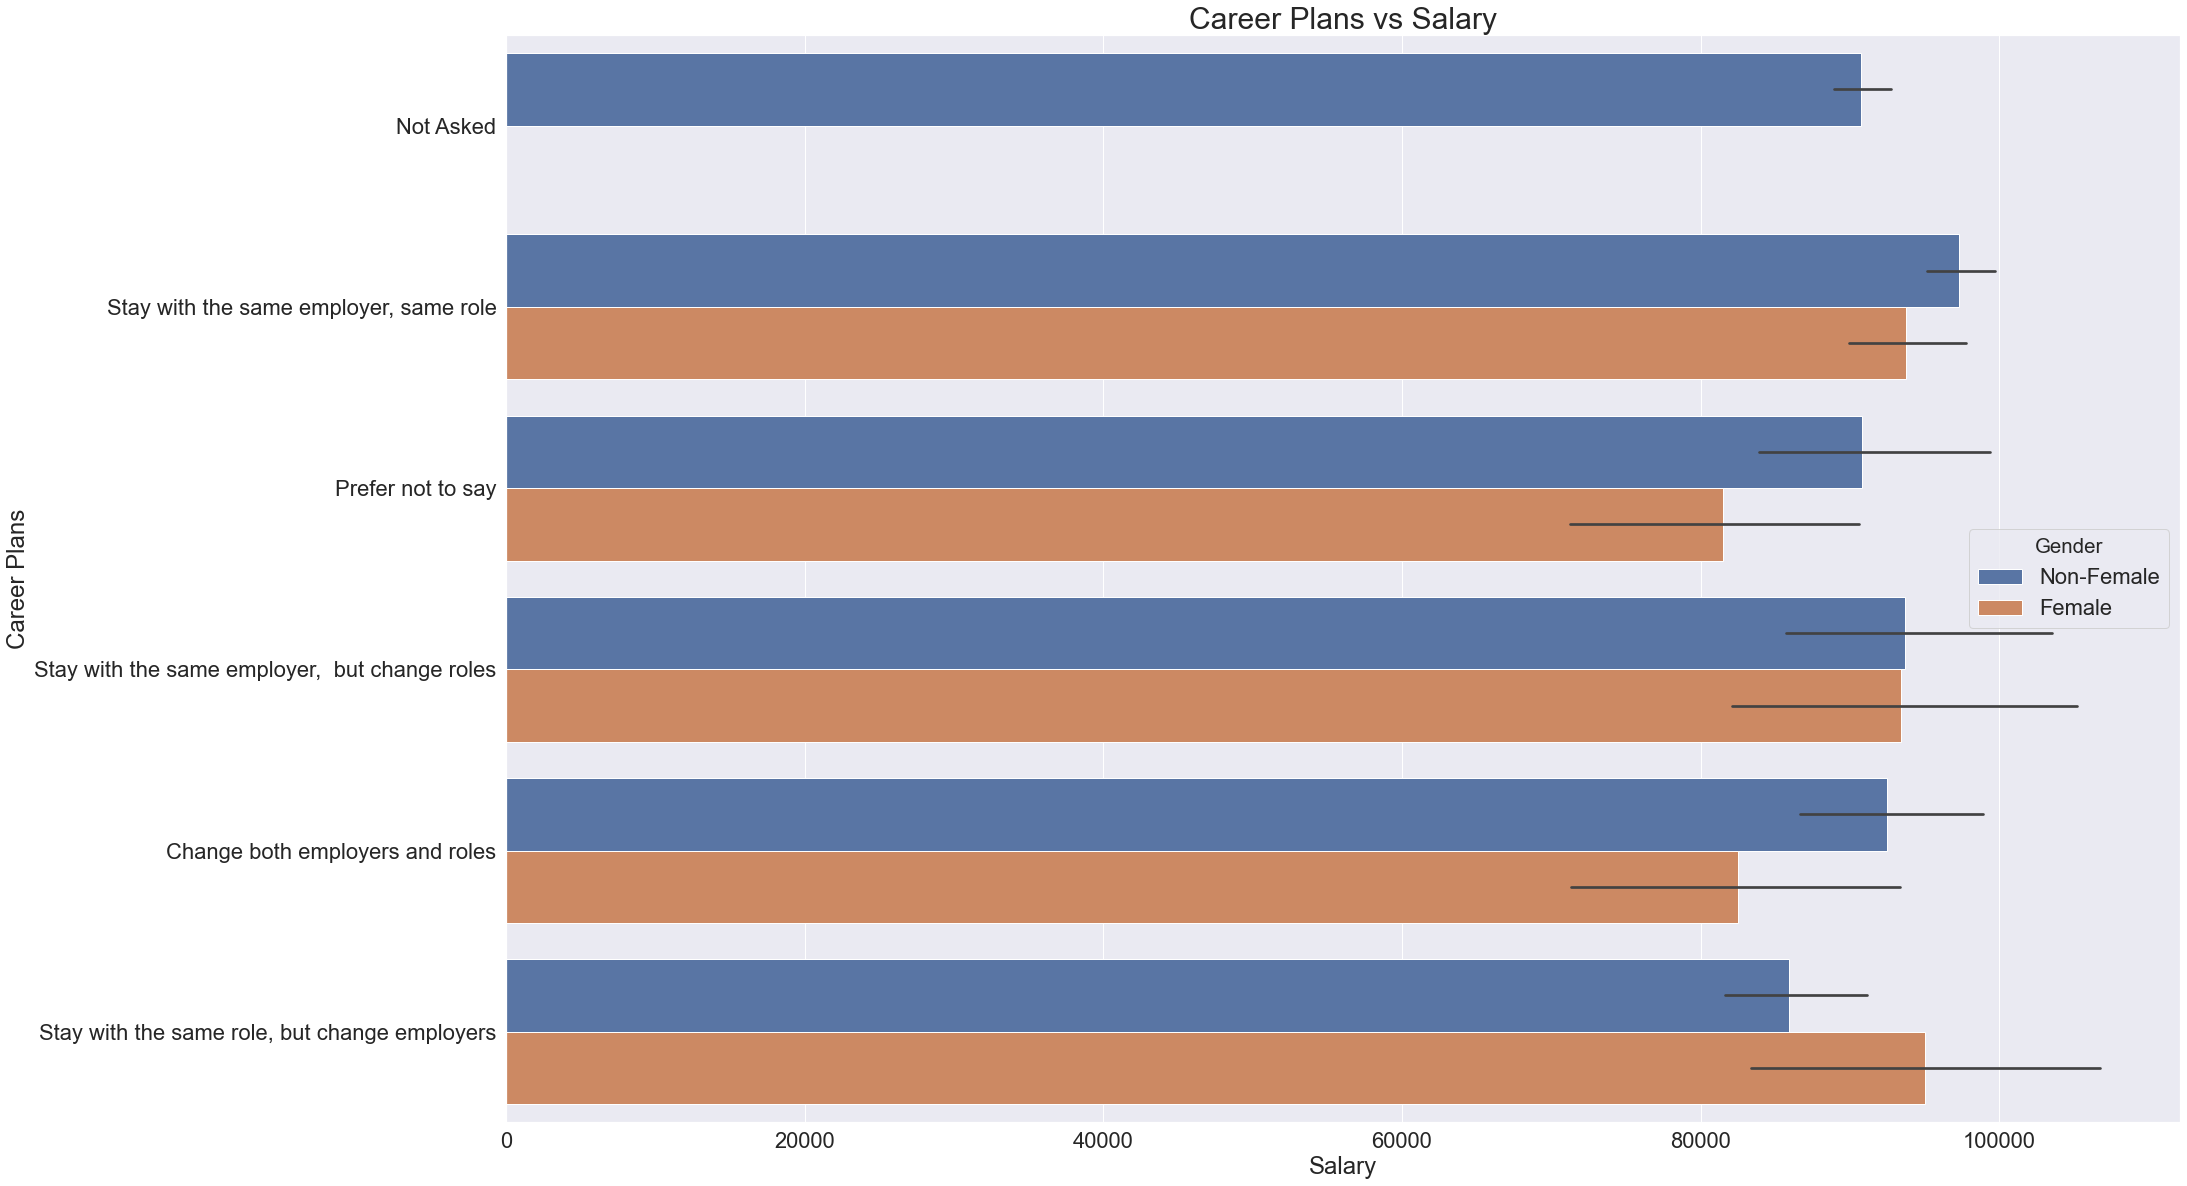

In [57]:
plt.figure(figsize=(30,20))
    
plt.title('Career Plans vs Salary',fontsize = 30)

sns.barplot(y = df['CareerPlansThisYear'], x = df["SalaryUSD"], hue = df['Gender'])


plt.xlabel('Salary')
plt.ylabel('Career Plans');

Women who want to switch jobs said 'change both employers and role' and 'Stay with the same role, but change employers' are having \\$80k to \\$90k salary but for some reason, they want to switch for a new job.

In [58]:
df['Education'].value_counts()

Bachelors (4 years)           3658
Masters                       1236
None (no degree completed)    1184
Associates (2 years)           764
Doctorate/PhD                   51
Name: Education, dtype: int64

There are ordinal values in which we can order them with numbers using a conversion dictionary.

#### Conversion Dictionary for 'Education' Column

In [26]:
df['Education'] = df['Education'].map({'None (no degree completed)' : 0, 'Associates (2 years)' : 1, 'Bachelors (4 years)' : 2,
                    'Masters' : 3, 'Doctorate/PhD' : 4})

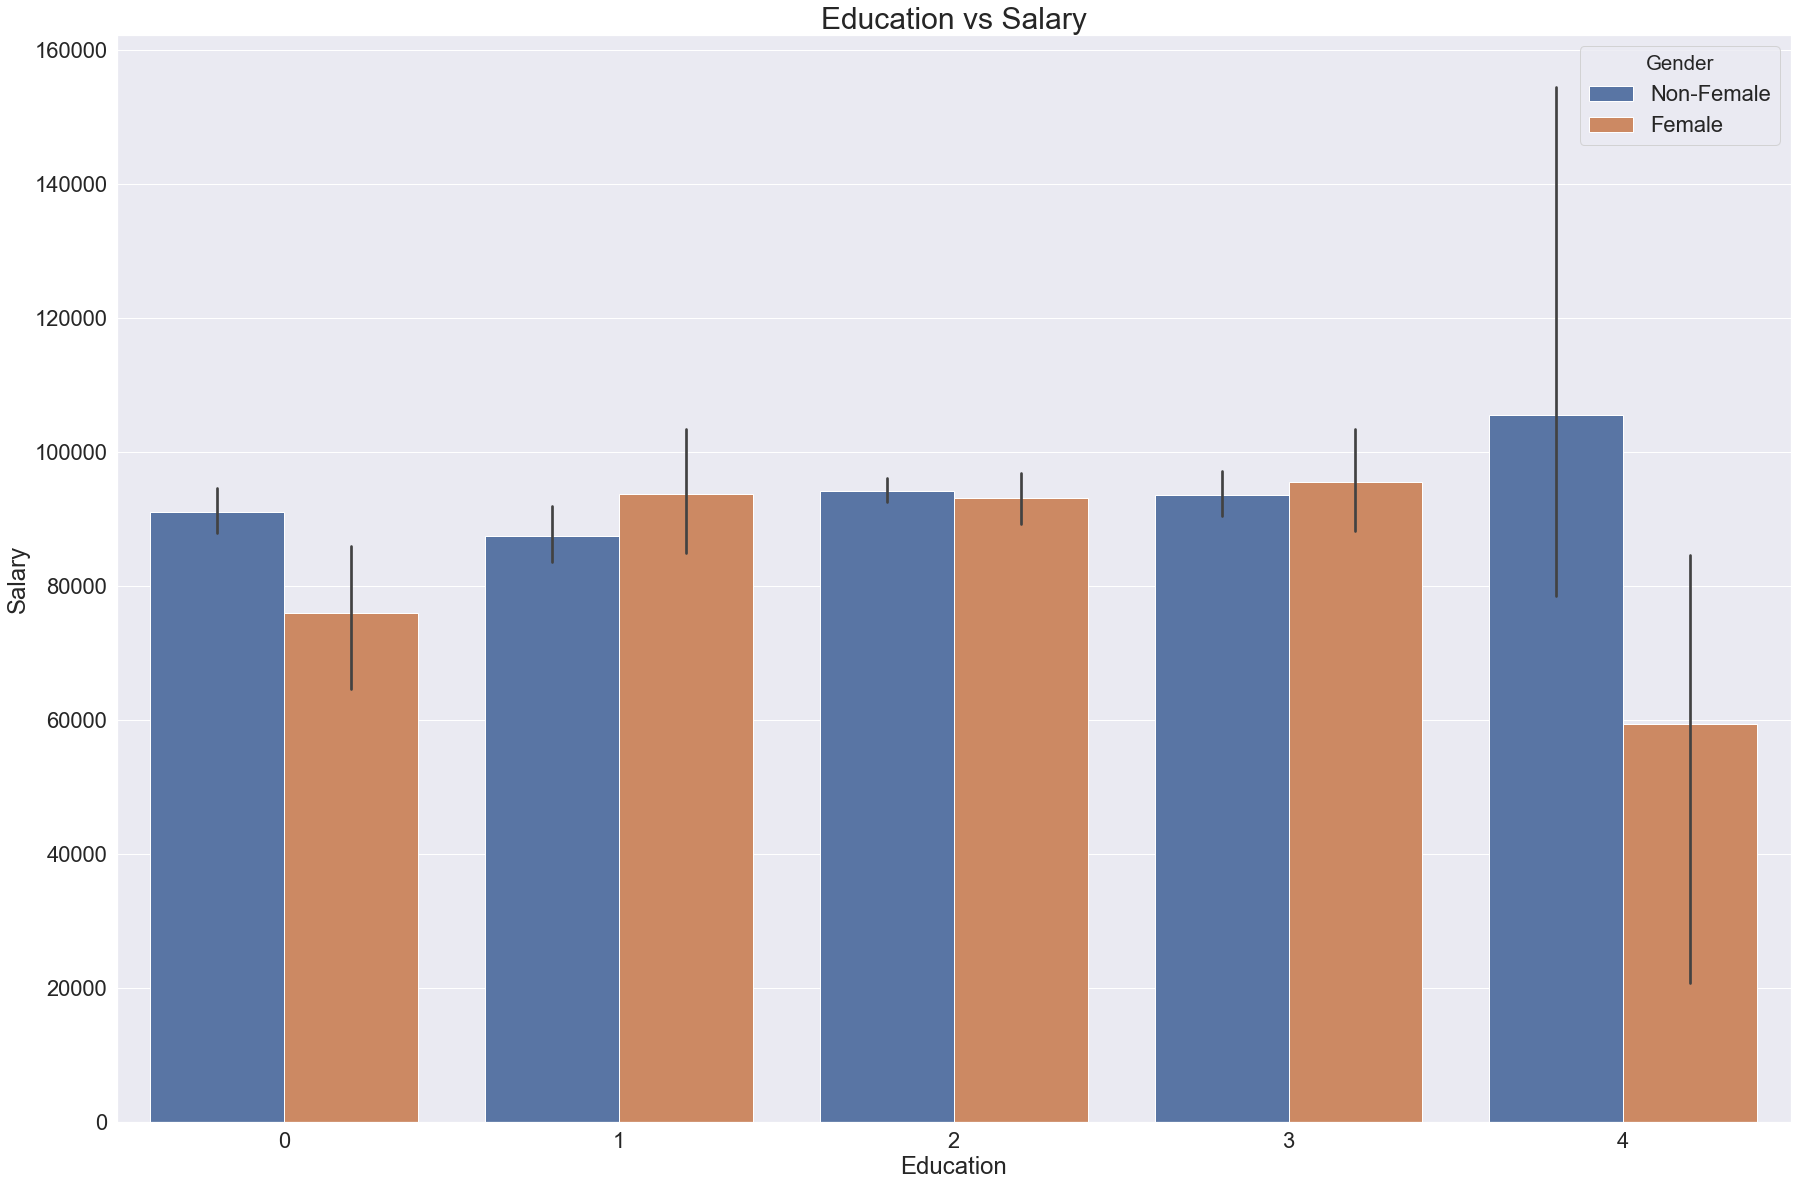

In [60]:
plt.figure(figsize=(30,20))
    
plt.title('Education vs Salary', fontsize = 30)

sns.barplot(x = df['Education'], y = df["SalaryUSD"], hue = df['Gender'])


plt.ylabel('Salary')
plt.xlabel('Education');

In every sector of education, all gender people are having a job with a good salary. there is less participation in 4 which means the Ph.D. level for women especially. Even without a degree it shows in 0 also having a job with a good salary in Tech field.

In [61]:
df['ManageStaff'].value_counts()

No     5289
Yes    1604
Name: ManageStaff, dtype: int64

For this column let us convert Yes and No to 1 and 0

#### Feature Engineering for column ManageStaff

In [27]:
df['ManageStaff'] = df['ManageStaff'].map({'No' : 0, 'Yes' : 1 })

#### Dummy categorical features

Finally, let's dummy the remaining categorical features:

In [28]:
df_dummy = pd.get_dummies(df)

In [64]:
df_dummy.head()

,Survey Year,Timestamp,SalaryUSD,Country,YearsWithThisDatabase,ManageStaff,YearsWithThisTypeOfJob,Education,HoursWorkedPerWeek,PrimaryDatabase_Amazon RDS (any flavor),...,"LookingForAnotherJob_Yes, actively looking for something else","LookingForAnotherJob_Yes, but only passively (just curious)",CareerPlansThisYear_Change both employers and roles,CareerPlansThisYear_Not Asked,CareerPlansThisYear_Prefer not to say,"CareerPlansThisYear_Stay with the same employer, but change roles","CareerPlansThisYear_Stay with the same employer, same role","CareerPlansThisYear_Stay with the same role, but change employers",Gender_Female,Gender_Non-Female
0,2017,2017-01-05 05:10:20.451,200000,1,10,0,5,3,45,0,...,0,1,0,1,0,0,0,0,0,1
1,2017,2017-01-05 05:26:23.388,61515,0,15,0,3,0,35,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,2017-01-05 05:32:57.367,95000,0,5,1,25,3,45,0,...,0,1,0,1,0,0,0,0,0,1
3,2017,2017-01-05 05:33:03.316,56000,0,6,0,2,1,40,0,...,0,1,0,1,0,0,0,0,0,1
4,2017,2017-01-05 05:34:33.866,35000,0,10,0,10,2,40,0,...,0,1,0,1,0,0,0,0,0,1


Checking example of dummied dataset

In [65]:
df_dummy.shape

(6893, 76)

Saving cleaned dataset:

In [67]:
df_dummy.to_csv('../datasets/cleaned_dataframe.csv', index = False)

Based on this cleaned dataset, we are likely to be able to answer our problem statement.

### Model Preparation

Separate our dataframe into separate objects for the target variable (y) and the input features (X) and perform the train and test split

Create separate object for input features

In [30]:
X = df_dummy.drop(columns = ['SalaryUSD','Timestamp', 'Survey Year'])

Create separate object for target variable

In [31]:
y = df['SalaryUSD']

#### Train and Test Splits

train test split to help check model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                        random_state = RANDOM_STATE)

#### Data Scaling

In [33]:
ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

Creating a RMSE function to use in models

In [34]:
def rmse(model, X, y):
    
    predictions = model.predict(X)
    
    rmse = np.sqrt(mean_squared_error(y, predictions))
    
    return rmse

With all our models, we will use RMSE as the regression metric to measure the success of our models. RMSE works well for us because it is given in the units of our target variable and can easily tell us the error in our predictions. Our goal is to minimize the RMSE as much as possible to get it close to 0.

### Modeling

#### Baseline Model

Instantiating our baseline model:

In [76]:
base = DummyRegressor(strategy="mean")

# Fitting our baseline model: 
base.fit(X_train, y_train)

# Calculating training and testing scores: 

print("Baseline Train RMSE: ", rmse(base, X_train,y_train))
print("Baseline Test RMSE: ", rmse(base, X_test,y_test))
print("Baseline Cross Val score: " ,cross_val_score(base, X, y).mean())

Baseline Train RMSE:  57965.304395185034
Baseline Test RMSE:  57179.03514526216
Baseline Cross Val score:  -0.002071386030166833


Our baseline model RMSE has a pretty large error, but this is the simplest model. Our other models should be an improvement from here. The lower test score indicates that our model is underfit.

#### Linear Regression

In [78]:
#instantiate model
lr = LinearRegression()

# fit model
lr.fit(X_train, y_train)

# Calculating training and testing scores: 
print(f'Train RMSE: {rmse(lr, X_train,y_train)}')
print(f'Test RMSE: {rmse(lr, X_test,y_test)}')
print("Linear Cross Val score: " ,cross_val_score(lr, X, y).mean())

Train RMSE: 50703.38416845333
Test RMSE: 50119.97911209769
Linear Cross Val score:  0.2195387409738557


These values are much better than the baseline model. But our model seems still under fit.

#### Lasso Regression

In [81]:
#Tuning params
tuned_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              'max_iter' : [100, 1000, 10000]}

# Instantiate model
lasso = GridSearchCV(Lasso(random_state= RANDOM_STATE), tuned_params, cv=5, n_jobs=-1)

# Fit model
lasso.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=2341,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'max_iter': [100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Calculating training and testing scores also RMSE

In [82]:
print(f'Lasso Model Train RMSE: {rmse(lasso, X_train_sc, y_train)}')
print(f'Lasso Model Test RMSE: {rmse(lasso, X_test_sc, y_test)}')
print("Lasso Cross Val score: " ,cross_val_score(lasso, X, y).mean())

Lasso Model Train RMSE: 51000.46589034643
Lasso Model Test RMSE: 50185.84877133396
Lasso Cross Val score:  0.22848560994332848


There is also not that kind of improvement we have here. This Lasso model seems worst than linear.

#### Ridge Regression

In [84]:
# Instantiate model
tuned_params = {'alpha': [ 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
               'max_iter' : [None, 5, 10, 20] }

# Instantiate model
ridge_model = GridSearchCV(Ridge(random_state= RANDOM_STATE), tuned_params,  cv=5, n_jobs=-1)

# Fit model
ridge_model.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=2341,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'max_iter': [None, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Calculating training and testing scores also RMSE

In [92]:
print(f'Ridge Model Train RMSE: {rmse(ridge_model, X_train_sc, y_train)}')
print(f'Ridge Model Test RMSE: {rmse(ridge_model, X_test_sc, y_test)}')
print("Ridge Model Cross Val score: " ,cross_val_score(ridge_model, X, y).mean())

Ridge Model Train RMSE: 50706.039509576236
Ridge Model Test RMSE: 50109.96369725679
Ridge Model Cross Val score:  0.22666508661491752


After using ridge regularization, our train and test RMSE are not have that much improvement. But better than lasso.

#### Decision Tree Regression

In [88]:
#Tuning params
tuned_params = {'min_samples_split': [1, 2, 3], 
                'min_samples_leaf': [5, 6, 7], 
                'max_depth': [None, 3, 4, 5, 6, 7],
                'max_features' : [None, .25, .5, .75] }

# Instantiate model
dt_model = GridSearchCV(DecisionTreeRegressor(random_state= RANDOM_STATE), tuned_params, cv=5, n_jobs=-1)

# Fit model
dt_model.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=2341,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 3, 4, 5, 6, 7],
                         'max_features': [None, 0.25, 0.5, 0.75],
                         'min_

In [94]:
dt_model.best_params_

{'max_depth': 4,
 'max_features': 0.75,
 'min_samples_leaf': 7,
 'min_samples_split': 2}

Calculating training and testing scores also RMSE

In [95]:
print(f'Descision Tree Train Model RMSE: {rmse(dt_model, X_train_sc, y_train)}')
print(f'Descision Tree Test Model RMSE: {rmse(dt_model, X_test_sc, y_test)}')
print("Descision Tree  Cross Val score: " ,cross_val_score(dt_model, X, y).mean())

Descision Tree Train Model RMSE: 50845.21751942861
Descision Tree Test Model RMSE: 50946.79963666729
Descision Tree  Cross Val score:  0.22134168679137303


Decision Tree Model has a much smaller margin between the test and the train RMSE. Through our model seems slightly overfit, but this is a better model we still have. And best parameters are max_depth = 4, max_features=0.75, min_samples_leaf = 7, min_samples_split = 2.

#### Bagging Regressor

In [91]:
#Tuning params
tuned_params = {'base_estimator' : [None, 50, 100],
               'n_estimators' : [10, 20, 30, 40],
               'max_samples' : [1, 2, 5, 10],
                 'max_features' : [.001, .5, 1.0, 1.5]}

# Instantiate model
bagged = GridSearchCV(BaggingRegressor(random_state= RANDOM_STATE), 
                      param_grid=tuned_params, cv=5, n_jobs=-1)
# Fit model
bagged.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=2341,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'base_estimator': [None, 50, 100],
                         'max_features': [0.001, 0.5, 1.0, 1.5],
                         'max_samples': [1, 2, 5, 10],
                         'n_estimators': [10, 20, 30, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [83]:
bagged.best_params_

{'base_estimator': None,
 'max_features': 1.0,
 'max_samples': 10,
 'n_estimators': 40}

Calculating training and testing scores also RMSE

In [96]:
print(f'Bagging Regressor Model Train RMSE: {rmse(bagged, X_train_sc, y_train)}')
print(f'Bagging Regressor Model Test RMSE: {rmse(bagged, X_test_sc, y_test)}')
print("Bagging Regressor Cross Val score: " ,cross_val_score(bagged, X, y).mean())

Bagging Regressor Model Train RMSE: 53372.203847845594
Bagging Regressor Model Test RMSE: 52250.668048261636
Bagging Regressor Cross Val score:  0.1416050264709508


Bagging Regressor has high  bias and variance.Thus our model is underfit with a much huge margin between the test and the train RMSE. The best parameters are base_estimator= None, max_features = 1.0, max_samples = 10, n_estimators = 40.

#### Random Forest Regression

In [10]:
#Tuning params
tuned_params = {'n_estimators': [300, 400, 450, 500],
                'min_samples_split': [5, 10, 15], 
                'min_samples_leaf': [ 2, 4, 5],
               'max_depth' : [None, 3, 5, 7],
                'max_features' : ['auto', .25, .02, .15],
                 'max_samples' : [None, 1, 3, 5, 7]}

# Instantiate model
rf_model = GridSearchCV(RandomForestRegressor(random_state= RANDOM_STATE), tuned_params, cv=5, n_jobs=-1)

# Fit model
rf_model.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=2341,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [11]:
rf_model.best_params_

{'max_depth': None,
 'max_features': 0.25,
 'max_samples': None,
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 450}

Calculating training and testing scores also RMSE

In [14]:
print(f'Random Forest Model Train RMSE: {rmse(rf_model, X_train_sc, y_train)}')
print(f'Random Forest Model Test RMSE: {rmse(rf_model, X_test_sc, y_test)}')
print("Random Forest Cross Val score: " , cross_val_score(rf_model, X, y).mean())

Random Forest Model Train RMSE: 42837.892551733625
Random Forest Model Test RMSE: 49201.32338219961
Random Forest Cross Val score:  0.2674060706357449


Random Forest model has better train and test score. It has Comparably  low bais and high variance. These values are much better than the baseline model. Now our model seems over fit, but with a much huge margin between the test and the train RMSE. And Best parameters are max_depth = None, max_features = 0.25, max_samples = None, min_samples_leaf = 2, min_samples_split = 15, n_estimators = 450

#### AdaBoost Regressor Model

In [48]:
#Tuning params
tuned_params = {'learning_rate': [.001, 0.00001, .002, 0.05, 0.1], 
                'n_estimators': [5, 8, 10, 20, 30], 
                }

# Instantiate model
ada_model = GridSearchCV(AdaBoostRegressor(random_state= RANDOM_STATE),
                         param_grid=tuned_params, cv=5, n_jobs=-1)

# Fit model
ada_model.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=2341),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 1e-05, 0.002, 0.05, 0.1],
                         'n_estimators': [5, 8, 10, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
ada_model.best_params_

{'learning_rate': 0.001, 'n_estimators': 20}

Calculating training and testing scores also RMSE

In [50]:
print(f'AdaBoost Regressor Model Train RMSE: {rmse(ada_model, X_train_sc, y_train)}')
print(f'AdaBoost Regressor Model Test RMSE: {rmse(ada_model, X_test_sc, y_test)}')
print("AdaBoost Regressor Cross Val score: " ,cross_val_score(ada_model, X, y).mean())

AdaBoost Regressor Model Train RMSE: 52109.22815144621
AdaBoost Regressor Model Test RMSE: 51229.23663731032
AdaBoost Regressor Cross Val score:  0.20346773283275094


AdaBoost Regressor Model has the worst train and test score with a much huge margin between the test and the train RMSE. we had best parameters are n_estimators = 20, learning_rate = 0.001.

#### Support Vector Regression

In [72]:
#tuning params
tuned_params = {'C': [ 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                'gamma': [ 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Instantiate model
svr_model = GridSearchCV(SVR(), tuned_params, cv=5, n_jobs=-1)

# Fit model
svr_model.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
svr_model.best_params_

{'C': 10000, 'gamma': 0.01}

Calculating training and testing scores also RMSE

In [53]:
print(f'SVR Model Train RMSE: {rmse(svr_model, X_train_sc, y_train)}')
print(f'SVR Model Test RMSE: {rmse(svr_model, X_test_sc, y_test)}')
print("SVR Model Cross Val score: " ,cross_val_score(svr_model, X, y).mean())

SVR Model Train RMSE: 51549.52883443913
SVR Model Test RMSE: 51028.98079841336
SVR Model Cross Val score:  0.21000484818207768


Support Vector Model has high bias and low variance. This is still underfit model. And best parameters are C = 10000, and gamma = 0.01. Thus our model still needs more improvements.

#### Gradient Boosting Regressor Model

In [8]:
#Tuning params
tuned_params = {'learning_rate': [0.01, 0.1, 0.2], 
                'n_estimators': [20, 50, 70], 
               'max_depth' : [None, 3, 5, 7],
               'max_features' : ['auto', .25, .5, .75, None],
                'min_samples_split': [5, 10, 15], 
                'min_samples_leaf': [1, 2, 4, 5],
               'alpha': [0.9]}


# Instantiate model
gradient_model = GridSearchCV(GradientBoostingRegressor(random_state= RANDOM_STATE),
                         param_grid=tuned_params, cv=5, n_jobs=-1)

# Fit model
gradient_model.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [9]:
gradient_model.best_params_

{'alpha': 0.9,
 'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 0.25,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 70}

Calculating training and testing scores also RMSE

In [16]:
print(f'Gradient Regressor Model Train RMSE: {rmse(gradient_model, X_train_sc, y_train)}')
print(f'Gradient Regressor Model Test RMSE: {rmse(gradient_model, X_test_sc, y_test)}')
print("Gradient Regressor Cross Val score: " ,cross_val_score(gradient_model, X, y).mean())

Gradient Regressor Model Train RMSE: 45255.78737910598
Gradient Regressor Model Test RMSE: 49526.155089396925
Gradient Regressor Cross Val score:  0.26118485476813336


Gradient Boosting Regressor model has better train and test score. It has Comparably low bais and high variance. These values are much better than the baseline model. Now our model seems over fit, but with a much smaller margin between the test and the train RMSE. And Best parameters are alpha = 0.9, learning_rate =0.1, max_depth = 3, max_features = 0.25, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 70

### Model Selection

#### Compare all Models

|          **Model's**          | **Train Score RMSE** | **Test Score RMSE** |
|:-----------------------------:|:--------------------:|:-------------------:|
|         Baseline Model        |       57965.30       |       57179.03      |
|       Linear Regression       |       50703.38       |       50119.97      |
|        Lasso Regression       |       51000.46       |       50185.85      |
|        Ridge Regression       |       50706.05       |       50109.96      |
| **Descision Tree Regression** |     **50845.21**     |     **50946.79**    |
|       Bagging Regressor       |       53372.20       |       52250.66      |
| Random Forest Regression      |       42837.89       |       49201.32      |
| AdaBoost Regressor Model      |       52109.22       |       51229.23      |
|   Support Vector Regression   |       51549.52       |       51028.98      |
|    Gradient Regressor Model   |       45255.78       |       49526.15      |

We would pick the Decision Tree Regression model because although it did not have the best RMSE score on the testing data, the gap between the train and test score is amongst the smallest of all the models. So the Decision Tree Regression model, indicating that this is our best model to select for this data. We can interpret RMSE as the error on average by which our predictions are off.

### Model Evaluation

#### Feature Importance

Building the best model again with the best hyperparameters

In [37]:
best_model = DecisionTreeRegressor(max_depth= 4, max_features= 0.75, min_samples_leaf= 7, 
                                   min_samples_split= 2, random_state= RANDOM_STATE)

#fitting model
best_model.fit(X_train_sc, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=0.75, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2341, splitter='best')

In [63]:
model_feature = pd.DataFrame(best_model.feature_importances_, index = X.columns)

In [65]:
model_feature[abs(model_feature[0]) > .00002].sort_values(by=0, ascending=False)

,0
Country,0.520610
YearsWithThisDatabase,0.264159
ManageStaff,0.074144
"EmploymentStatus_Independent consultant, contractor, freelancer, or company owner",0.057612
EmploymentStatus_Full time employee,0.031572
PrimaryDatabase_Amazon RDS (any flavor),0.018813
"JobTitle_DBA (Production Focus - build & troubleshoot servers, HA/DR)",0.013424
YearsWithThisTypeOfJob,0.010629
"LookingForAnotherJob_Yes, actively looking for something else",0.005260
JobTitle_Architect,0.003778


Thus these are the important features from our datasets which are dependent on Salary. let us plot them in a barh plot.

#### Ploting Important features

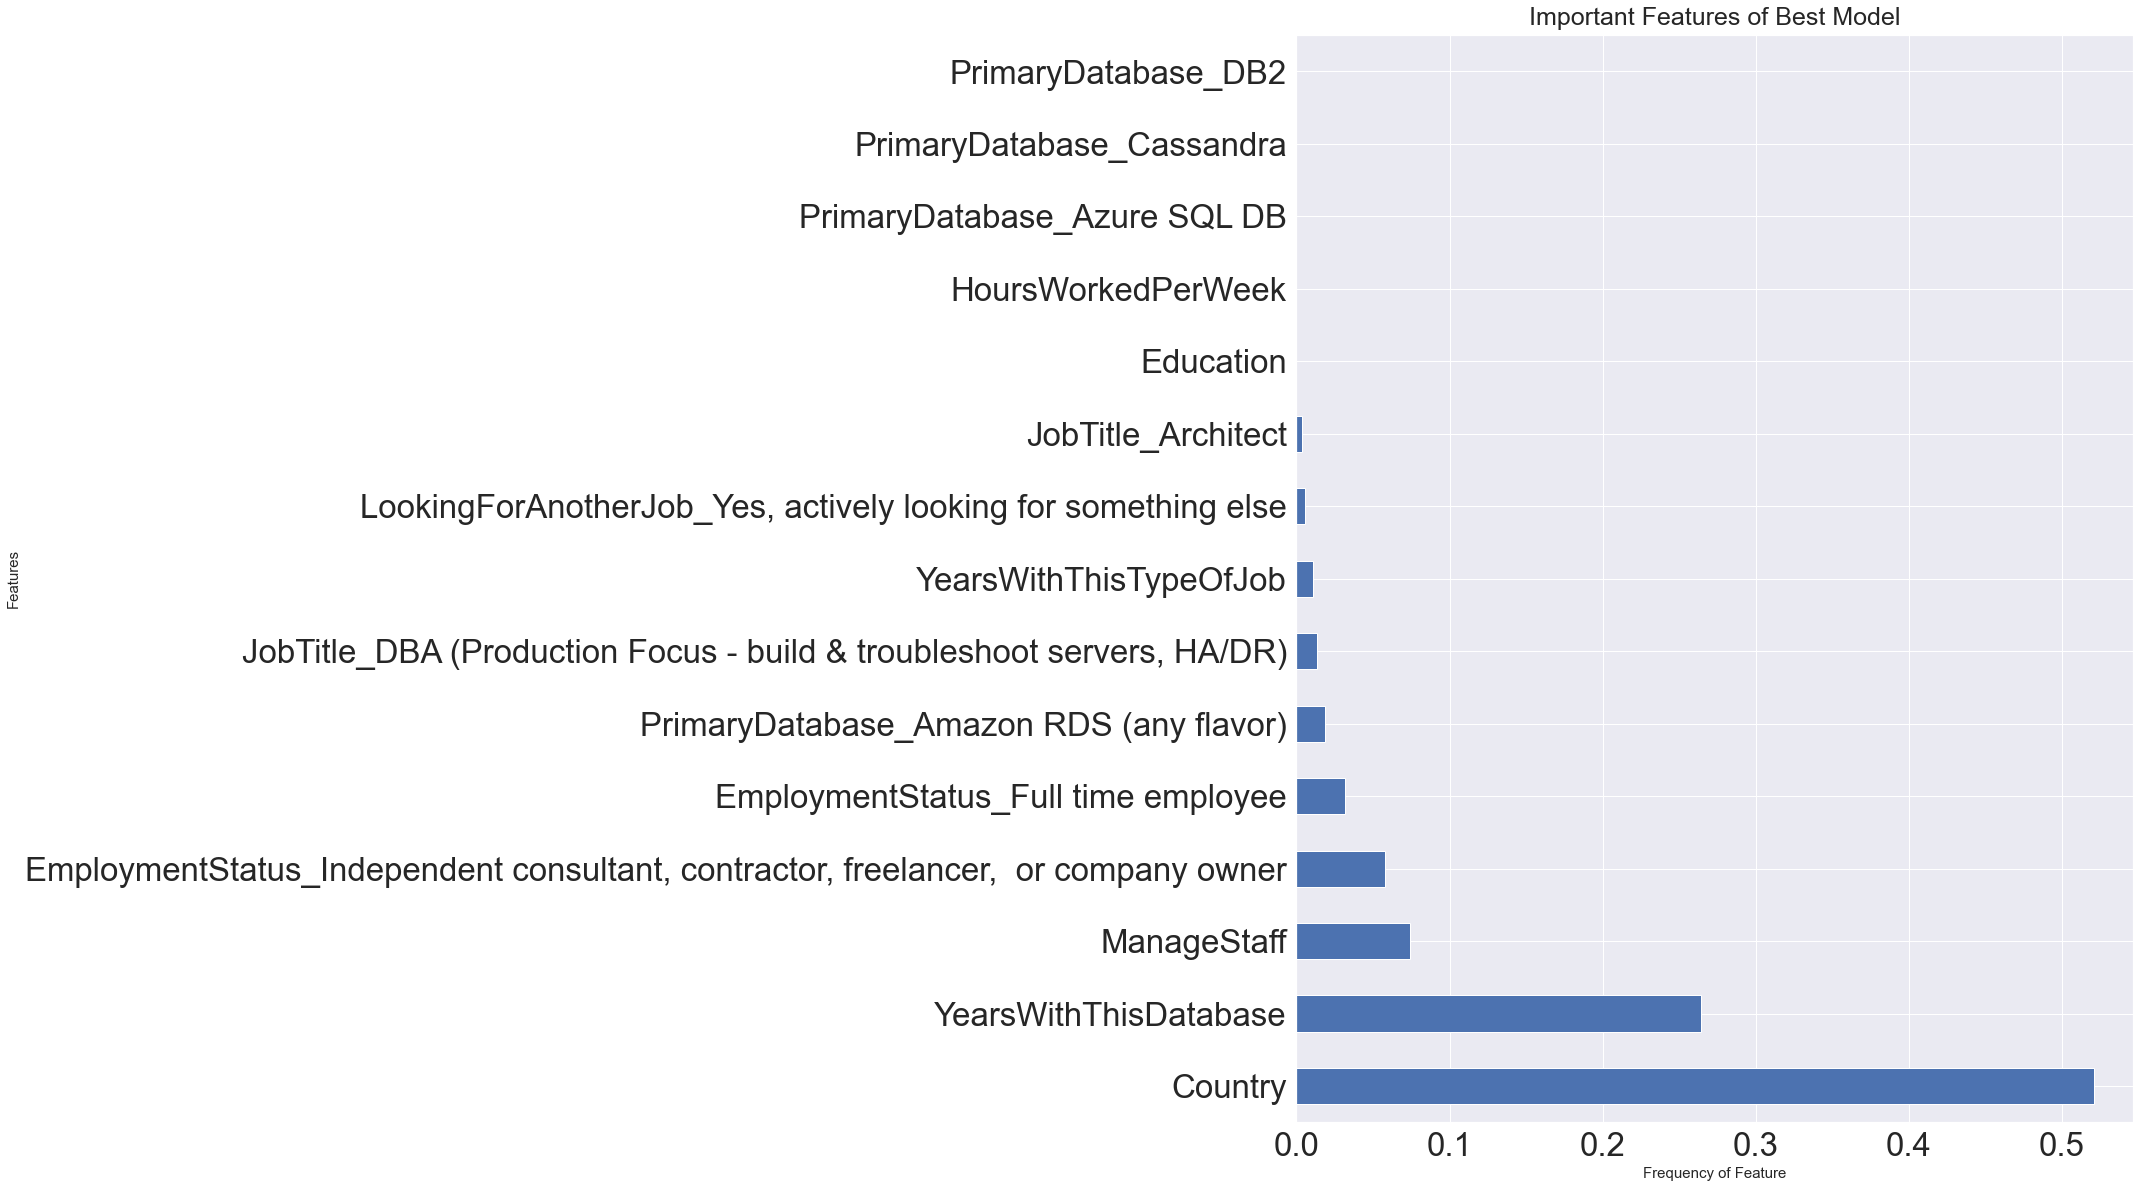

In [66]:
plt.figure(figsize= (15, 20))
plt.title('Important Features of Best Model', fontsize= 25, pad = 10)
plt.xlabel('Frequency of Feature', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
(pd.Series(best_model.feature_importances_, index=X.columns)
   .nlargest(15)
   .plot(kind='barh'));  

Here **Country, YearsWithThisDatabase, ManageStaff, EmploymentStatus_Independent consultant, contractor, freelancer, or company owner, EmploymentStatus_Full time employee,  PrimaryDatabase_Amazon RDS (any flavor), JobTitle_DBA(Production Focus - build & toubleshoot servers, HA/DR), YearWithThisTypeOfJob** are the most important features that are related to target column SalaryUSD. We can see the presence of some unexpected variables too. Most surprisingly Hours worked per week have less importance in salary negotiation.
<br>
From this model, women can get an idea about the feature they should know or study before negotiating their salary. even they will get to know that are they are offering fairly or not.

### Conclusions and Recommendations

Our Decision Tree Regressor was able to give us the most successful RMSE scores and was selected as the best model to help solve our study problem. But If I get more time I will go over unexpected columns importance again to have a more proper prediction.
<br>
<br>
Negotiating salary isn’t easy, and it can be especially difficult for women. In general, women are less likely to ask for more money when they are offered a job and more likely to stay in a lower paid job. Reasons vary, but some of it involves being uncomfortable discussing salary and being hesitant to ask for more.
<br>
<br>
Some experts believe one should always negotiate salary and ask for more money. Before one do that though, it’s a good idea to research the job and the employer to be sure that the compensation package is negotiable. There are some positions where the pay rate is set in advance. On the plus side, there won’t be gender discrimination because everyone is paid the same. On the negative side, what you are offered is what you will be paid.Our model will help Women of the United State to know what should they research for, how much they can get hourly in which job or title of the job, how much their education is necessary to have a better salary.

### Reference 

1. https://data.world/finance/data-professional-salary-survey/workspace/file?filename=2019_Data_Professional_Salary_Survey_Responses.xlsx


2. https://www.roberthalf.com/blog/compensation-and-benefits/who-most-likely-negotiated-salary